In [10]:
# Proceso para generar splits de entrenamiento a partir de datasets muestreados
import os
import pandas as pd
from recbole.config import Config
from recbole.data import create_dataset
from recbole.utils import init_seed

# Directorio donde están los datasets muestreados
sampled_dataset_dir = './dataset_sampled/'
# Directorio donde se guardarán los splits de entrenamiento
output_dir = './dataset_sampled_train_split/'
os.makedirs(output_dir, exist_ok=True)

# Obtener lista de datasets sampleados (el nombre de las carpetas son iguales al de los datasets)
sampled_datasets = [d for d in os.listdir(sampled_dataset_dir) if os.path.isdir(os.path.join(sampled_dataset_dir, d))]
print(f"Se encontraron {len(sampled_datasets)} datasets muestreados.")

for dataset_name in sampled_datasets:
    print(f"\nProcesando dataset: {dataset_name}...")
    try:
        # Se usa un modelo generico que no afectara, se fija la semilla a la de defecto
        config = Config(
            model='BPR',
            dataset=dataset_name,
            config_dict={
                'data_path': sampled_dataset_dir,
                'seed': 2020,
                'eval_args': {
                    'split': {'RS': [0.8, 0.1, 0.1]},
                    'order': 'RO',
                    'group_by': 'user',
                    'mode': 'uni100'
                },
                'USER_ID_FIELD': 'user_id',
                'ITEM_ID_FIELD': 'item_id',
                'RATING_FIELD': 'rating',
                'TIME_FIELD': 'timestamp',
            }
        )
        init_seed(config['seed'], config['reproducibility'])
        dataset = create_dataset(config)
        # El método build() aplica la configuración de 'eval_args' para dividir los datos.
        built_datasets = dataset.build()
        train_dataset = built_datasets[0]
        # extrae los datos del .inter
        interaction = train_dataset.inter_feat
        interaction_dict = interaction.numpy()
        train_df = pd.DataFrame(interaction_dict)
        # Mapear IDs internos de vuelta a tokens originales
        for field in train_df.columns:
            if field in dataset.field2id_token:
                train_df[field] = dataset.id2token(field, train_df[field].values)
        
        train_df_renamed = train_df.rename(columns={
            config['USER_ID_FIELD']: config['USER_ID_FIELD'] + ':token',
            config['ITEM_ID_FIELD']: config['ITEM_ID_FIELD'] + ':token',
            config['RATING_FIELD']: config['RATING_FIELD'] + ':float',
            config['TIME_FIELD']: config['TIME_FIELD'] + ':float',
        })

        output_path = os.path.join(output_dir, f"{dataset_name}.inter")
        train_df_renamed.to_csv(output_path, sep='\t', index=False)
        print(f"Split de entrenamiento guardado en: {output_path}")


        

    except Exception as e:
        print(f'Error con {dataset_name}: {e}')
        

Se encontraron 58 datasets muestreados.

Procesando dataset: douban_sample1...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)


Split de entrenamiento guardado en: ./dataset_sampled_train_split/douban_sample1.inter

Procesando dataset: yelp_sample2...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)


Split de entrenamiento guardado en: ./dataset_sampled_train_split/yelp_sample2.inter

Procesando dataset: food_sample2...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)


Split de entrenamiento guardado en: ./dataset_sampled_train_split/food_sample2.inter

Procesando dataset: netflix_sample2...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)


Split de entrenamiento guardado en: ./dataset_sampled_train_split/netflix_sample2.inter

Procesando dataset: BeerAdvocate_sample2...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)


Split de entrenamiento guardado en: ./dataset_sampled_train_split/BeerAdvocate_sample2.inter

Procesando dataset: KDD2010_sample3...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)
/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whi

Split de entrenamiento guardado en: ./dataset_sampled_train_split/KDD2010_sample3.inter

Procesando dataset: twitch-100k_sample2...
Split de entrenamiento guardado en: ./dataset_sampled_train_split/twitch-100k_sample2.inter

Procesando dataset: epinions_sample2...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)


Split de entrenamiento guardado en: ./dataset_sampled_train_split/epinions_sample2.inter

Procesando dataset: amazon_digital_music_sample1...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)


Split de entrenamiento guardado en: ./dataset_sampled_train_split/amazon_digital_music_sample1.inter

Procesando dataset: ml-1m_sample1...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)
/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whi

Split de entrenamiento guardado en: ./dataset_sampled_train_split/ml-1m_sample1.inter

Procesando dataset: steam_sample3...
Split de entrenamiento guardado en: ./dataset_sampled_train_split/steam_sample3.inter

Procesando dataset: steam_sample2...
Split de entrenamiento guardado en: ./dataset_sampled_train_split/steam_sample2.inter

Procesando dataset: jester_sample3...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)


Split de entrenamiento guardado en: ./dataset_sampled_train_split/jester_sample3.inter

Procesando dataset: epinions_sample1...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)


Split de entrenamiento guardado en: ./dataset_sampled_train_split/epinions_sample1.inter

Procesando dataset: yelp_sample3...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)


Split de entrenamiento guardado en: ./dataset_sampled_train_split/yelp_sample3.inter

Procesando dataset: GoodReads_sample2...
Split de entrenamiento guardado en: ./dataset_sampled_train_split/GoodReads_sample2.inter

Procesando dataset: ModCloth_sample2...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)
/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whi

Split de entrenamiento guardado en: ./dataset_sampled_train_split/ModCloth_sample2.inter

Procesando dataset: netflix_sample1...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)


Split de entrenamiento guardado en: ./dataset_sampled_train_split/netflix_sample1.inter

Procesando dataset: ml-1m_sample2...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)
/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whi

Split de entrenamiento guardado en: ./dataset_sampled_train_split/ml-1m_sample2.inter

Procesando dataset: epinions_sample3...
Split de entrenamiento guardado en: ./dataset_sampled_train_split/epinions_sample3.inter

Procesando dataset: netflix_sample3...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)


Split de entrenamiento guardado en: ./dataset_sampled_train_split/netflix_sample3.inter

Procesando dataset: KDD2010_sample1...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)


Split de entrenamiento guardado en: ./dataset_sampled_train_split/KDD2010_sample1.inter

Procesando dataset: amazon_digital_music_sample3...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)


Split de entrenamiento guardado en: ./dataset_sampled_train_split/amazon_digital_music_sample3.inter

Procesando dataset: food_sample1...
Split de entrenamiento guardado en: ./dataset_sampled_train_split/food_sample1.inter

Procesando dataset: jester_sample1...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)
/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whi

Split de entrenamiento guardado en: ./dataset_sampled_train_split/jester_sample1.inter

Procesando dataset: RateBeer_sample3...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)


Split de entrenamiento guardado en: ./dataset_sampled_train_split/RateBeer_sample3.inter

Procesando dataset: yelp_sample1...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)


Split de entrenamiento guardado en: ./dataset_sampled_train_split/yelp_sample1.inter

Procesando dataset: DianPing_sample3...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)


Split de entrenamiento guardado en: ./dataset_sampled_train_split/DianPing_sample3.inter

Procesando dataset: DianPing_sample1...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)


Split de entrenamiento guardado en: ./dataset_sampled_train_split/DianPing_sample1.inter

Procesando dataset: amazon_digital_music_sample2...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)


Split de entrenamiento guardado en: ./dataset_sampled_train_split/amazon_digital_music_sample2.inter

Procesando dataset: BeerAdvocate_sample1...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)
/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whi

Split de entrenamiento guardado en: ./dataset_sampled_train_split/BeerAdvocate_sample1.inter

Procesando dataset: food_sample3...
Split de entrenamiento guardado en: ./dataset_sampled_train_split/food_sample3.inter

Procesando dataset: ModCloth_sample1...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)
/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whi

Split de entrenamiento guardado en: ./dataset_sampled_train_split/ModCloth_sample1.inter

Procesando dataset: yahoo-music_sample3...
Split de entrenamiento guardado en: ./dataset_sampled_train_split/yahoo-music_sample3.inter

Procesando dataset: twitch-100k_sample3...
Split de entrenamiento guardado en: ./dataset_sampled_train_split/twitch-100k_sample3.inter

Procesando dataset: douban_sample2...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)
/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whi

Split de entrenamiento guardado en: ./dataset_sampled_train_split/douban_sample2.inter

Procesando dataset: steam_sample1...
Split de entrenamiento guardado en: ./dataset_sampled_train_split/steam_sample1.inter

Procesando dataset: jester_sample2...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)


Split de entrenamiento guardado en: ./dataset_sampled_train_split/jester_sample2.inter

Procesando dataset: lastfm_sample1...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)


Split de entrenamiento guardado en: ./dataset_sampled_train_split/lastfm_sample1.inter

Procesando dataset: anime_sample3...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)


Split de entrenamiento guardado en: ./dataset_sampled_train_split/anime_sample3.inter

Procesando dataset: book-crossing_sample1...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)


Split de entrenamiento guardado en: ./dataset_sampled_train_split/book-crossing_sample1.inter

Procesando dataset: anime_sample2...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)


Split de entrenamiento guardado en: ./dataset_sampled_train_split/anime_sample2.inter

Procesando dataset: GoodReads_sample3...
Split de entrenamiento guardado en: ./dataset_sampled_train_split/GoodReads_sample3.inter

Procesando dataset: twitch-100k_sample1...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)
/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whi

Split de entrenamiento guardado en: ./dataset_sampled_train_split/twitch-100k_sample1.inter

Procesando dataset: douban_sample3...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)


Split de entrenamiento guardado en: ./dataset_sampled_train_split/douban_sample3.inter

Procesando dataset: yahoo-music_sample2...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)


Split de entrenamiento guardado en: ./dataset_sampled_train_split/yahoo-music_sample2.inter

Procesando dataset: DianPing_sample2...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)


Split de entrenamiento guardado en: ./dataset_sampled_train_split/DianPing_sample2.inter

Procesando dataset: book-crossing_sample3...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)


Split de entrenamiento guardado en: ./dataset_sampled_train_split/book-crossing_sample3.inter

Procesando dataset: RateBeer_sample2...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)


Split de entrenamiento guardado en: ./dataset_sampled_train_split/RateBeer_sample2.inter

Procesando dataset: BeerAdvocate_sample3...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)


Split de entrenamiento guardado en: ./dataset_sampled_train_split/BeerAdvocate_sample3.inter

Procesando dataset: anime_sample1...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)


Split de entrenamiento guardado en: ./dataset_sampled_train_split/anime_sample1.inter

Procesando dataset: book-crossing_sample2...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)


Split de entrenamiento guardado en: ./dataset_sampled_train_split/book-crossing_sample2.inter

Procesando dataset: RateBeer_sample1...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)


Split de entrenamiento guardado en: ./dataset_sampled_train_split/RateBeer_sample1.inter

Procesando dataset: yahoo-music_sample1...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)


Split de entrenamiento guardado en: ./dataset_sampled_train_split/yahoo-music_sample1.inter

Procesando dataset: GoodReads_sample1...
Split de entrenamiento guardado en: ./dataset_sampled_train_split/GoodReads_sample1.inter

Procesando dataset: ml-1m_sample3...


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)
/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whi

Split de entrenamiento guardado en: ./dataset_sampled_train_split/ml-1m_sample3.inter

Procesando dataset: ModCloth_sample3...
Split de entrenamiento guardado en: ./dataset_sampled_train_split/ModCloth_sample3.inter

Procesando dataset: KDD2010_sample2...
Split de entrenamiento guardado en: ./dataset_sampled_train_split/KDD2010_sample2.inter


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)


In [11]:
import os
import pandas as pd

original_sampled_dir = './dataset_sampled/'
train_split_dir = './dataset_sampled_train_split/'
output_dir_full = './dataset_sampled_train_split_full/'
os.makedirs(output_dir_full, exist_ok=True)

# Obtenemos la lista de archivos de split de entrenamiento
train_split_files = [f for f in os.listdir(train_split_dir) if f.endswith('.inter')]
print(f"Se encontraron {len(train_split_files)} splits de entrenamiento para procesar.")

for split_filename in train_split_files:
    dataset_name = split_filename.replace('.inter', '')

    try:
        original_inter_path = os.path.join(original_sampled_dir, dataset_name, f"{dataset_name}.inter")
        df_original = pd.read_csv(original_inter_path, sep='\t')
        df_original.rename(columns={'user_id:token': 'user_id', 'item_id:token': 'item_id'}, inplace=True)
        split_inter_path = os.path.join(train_split_dir, split_filename)
        df_split = pd.read_csv(split_inter_path, sep='\t')
        df_split.rename(columns={'user_id:token': 'user_id', 'item_id:token': 'item_id'}, inplace=True)
        df_final = pd.merge(df_original, df_split[['user_id', 'item_id']], on=['user_id', 'item_id'], how='inner')
        df_final.rename(columns={'user_id': 'user_id:token', 'item_id': 'item_id:token'}, inplace=True)
        output_path = os.path.join(output_dir_full, split_filename)
        df_final.to_csv(output_path, sep='\t', index=False)



    except Exception as e:
        print(f'Error al procesar {dataset_name}: {e}')


Se encontraron 58 splits de entrenamiento para procesar.


In [12]:
# post procesamiento para dian ping que tiene nans en rating
import os
import pandas as pd
import glob

# Directorio donde están los datasets (ajusta si tu ruta es diferente)
dataset_base_dir = './dataset_sampled_train_split_full/'

# Buscar archivos que coincidan con DianPing_sample*.inter directamente
dianping_files = glob.glob(os.path.join(dataset_base_dir, 'DianPing_sample*.inter'))

print(f"Se encontraron {len(dianping_files)} archivos de DianPing para procesar.")

for file_path in dianping_files:
    # Obtener el nombre del dataset desde el nombre del archivo
    filename = os.path.basename(file_path)
    dataset_name = filename.replace('.inter', '')
    
    try:
        # Cargar el archivo .inter
        df = pd.read_csv(file_path, sep='\t')
        
        # Identificar la columna de rating (generalmente 'rating:float')
        rating_col = [col for col in df.columns if 'rating' in col]
        
        if rating_col:
            col_name = rating_col[0]
            # Verificar si hay NaNs
            if df[col_name].isnull().any():
                nan_count = df[col_name].isnull().sum()
                print(f"--> Corrigiendo {dataset_name}: Se encontraron {nan_count} valores NaN en '{col_name}'.")
                
                # Reemplazar NaN con 0.0
                df[col_name] = df[col_name].fillna(0.0)
                
                # Guardar el archivo corregido
                df.to_csv(file_path, sep='\t', index=False)
                print(f"    Archivo guardado exitosamente: {file_path}")
            else:
                print(f"--> {dataset_name}: No se encontraron valores NaN en '{col_name}'.")
        else:
            print(f"--> Advertencia en {dataset_name}: No se encontró columna de rating.")
            
    except Exception as e:
        print(f"Error procesando {dataset_name}: {e}")

print("\nProceso de limpieza completado.")

Se encontraron 3 archivos de DianPing para procesar.
--> Corrigiendo DianPing_sample3: Se encontraron 6116 valores NaN en 'rating:float'.
    Archivo guardado exitosamente: ./dataset_sampled_train_split_full/DianPing_sample3.inter
--> Corrigiendo DianPing_sample1: Se encontraron 6011 valores NaN en 'rating:float'.
    Archivo guardado exitosamente: ./dataset_sampled_train_split_full/DianPing_sample1.inter
--> Corrigiendo DianPing_sample2: Se encontraron 6020 valores NaN en 'rating:float'.
    Archivo guardado exitosamente: ./dataset_sampled_train_split_full/DianPing_sample2.inter

Proceso de limpieza completado.


In [13]:
# Procesamiento para que funcione steam en los 3 samples
import os
import pandas as pd

# Directorio base
base_dir = 'dataset_sampled_train_split_full/'
dataset_prefix = 'steam'

# Iterar sobre los 3 samples
for i in range(1, 4):
    filename = f"{dataset_prefix}_sample{i}.inter"
    file_path = os.path.join(base_dir, filename)
    
    if os.path.exists(file_path):
        print(f"Procesando {filename}...")
        try:
            # Cargar datos
            df = pd.read_csv(file_path, sep='\t')
            
            
            # Crear rating binario (1.0) ya que twitch suele ser feedback implícito
            # y el script de perturbación espera una columna 'rating'
            df['rating'] = 1.0
            
            
            # Guardar el archivo procesado (sobrescribiendo el original o creando uno nuevo si prefieres)
            # Se usa tabulador como separador para mantener consistencia con .inter
            df.to_csv(file_path, sep='\t', index=False)
            print(f"  -> Guardado exitosamente: {file_path}")
            
        except Exception as e:
            print(f"  -> Error procesando {filename}: {e}")
    else:
        print(f"Advertencia: No se encontró el archivo {file_path}")

print("\nProceso de Twitch completado.")

Procesando steam_sample1.inter...
  -> Guardado exitosamente: dataset_sampled_train_split_full/steam_sample1.inter
Procesando steam_sample2.inter...
  -> Guardado exitosamente: dataset_sampled_train_split_full/steam_sample2.inter
Procesando steam_sample3.inter...
  -> Guardado exitosamente: dataset_sampled_train_split_full/steam_sample3.inter

Proceso de Twitch completado.


In [14]:
# post procesamiento para ModCloth que tiene nans en rating
import os
import pandas as pd
import glob

# Directorio donde están los datasets (ajusta si tu ruta es diferente)
dataset_base_dir = './dataset_sampled_train_split_full/'

# Buscar archivos que coincidan con ModCloth*.inter directamente
ModCloth_files = glob.glob(os.path.join(dataset_base_dir, 'ModCloth*.inter'))

print(f"Se encontraron {len(ModCloth_files)} archivos de ModCloth para procesar.")

for file_path in ModCloth_files:
    # Obtener el nombre del dataset desde el nombre del archivo
    filename = os.path.basename(file_path)
    dataset_name = filename.replace('.inter', '')
    
    try:
        # Cargar el archivo .inter
        df = pd.read_csv(file_path, sep='\t')
        
        # Identificar la columna de rating (generalmente 'rating:float')
        rating_col = [col for col in df.columns if 'rating' in col]
        
        if rating_col:
            col_name = rating_col[0]
            # Verificar si hay NaNs
            if df[col_name].isnull().any():
                nan_count = df[col_name].isnull().sum()
                print(f"--> Corrigiendo {dataset_name}: Se encontraron {nan_count} valores NaN en '{col_name}'.")
                
                # Reemplazar NaN con 0.0
                df[col_name] = df[col_name].fillna(0.0)
                
                # Guardar el archivo corregido
                df.to_csv(file_path, sep='\t', index=False)
                print(f"    Archivo guardado exitosamente: {file_path}")
            else:
                print(f"--> {dataset_name}: No se encontraron valores NaN en '{col_name}'.")
        else:
            print(f"--> Advertencia en {dataset_name}: No se encontró columna de rating.")
            
    except Exception as e:
        print(f"Error procesando {dataset_name}: {e}")

print("\nProceso de limpieza completado.")

Se encontraron 3 archivos de ModCloth para procesar.
--> Corrigiendo ModCloth_sample1: Se encontraron 5 valores NaN en 'rating:float'.
    Archivo guardado exitosamente: ./dataset_sampled_train_split_full/ModCloth_sample1.inter
--> Corrigiendo ModCloth_sample2: Se encontraron 5 valores NaN en 'rating:float'.
    Archivo guardado exitosamente: ./dataset_sampled_train_split_full/ModCloth_sample2.inter
--> Corrigiendo ModCloth_sample3: Se encontraron 5 valores NaN en 'rating:float'.
    Archivo guardado exitosamente: ./dataset_sampled_train_split_full/ModCloth_sample3.inter

Proceso de limpieza completado.


In [15]:
# Procesamiento para que funcione twitch en los 3 samples
import os
import pandas as pd

# Directorio base
base_dir = 'dataset_sampled_train_split_full/'
dataset_prefix = 'twitch-100k'

# Iterar sobre los 3 samples
for i in range(1, 4):
    filename = f"{dataset_prefix}_sample{i}.inter"
    file_path = os.path.join(base_dir, filename)
    
    if os.path.exists(file_path):
        print(f"Procesando {filename}...")
        try:
            # Cargar datos
            df = pd.read_csv(file_path, sep='\t')
            
            
            # Crear rating binario (1.0) ya que twitch suele ser feedback implícito
            # y el script de perturbación espera una columna 'rating'
            df['rating'] = 1.0
            
            
            # Guardar el archivo procesado (sobrescribiendo el original o creando uno nuevo si prefieres)
            # Se usa tabulador como separador para mantener consistencia con .inter
            df.to_csv(file_path, sep='\t', index=False)
            print(f"  -> Guardado exitosamente: {file_path}")
            
        except Exception as e:
            print(f"  -> Error procesando {filename}: {e}")
    else:
        print(f"Advertencia: No se encontró el archivo {file_path}")

print("\nProceso de Twitch completado.")

Procesando twitch-100k_sample1.inter...
  -> Guardado exitosamente: dataset_sampled_train_split_full/twitch-100k_sample1.inter
Procesando twitch-100k_sample2.inter...
  -> Guardado exitosamente: dataset_sampled_train_split_full/twitch-100k_sample2.inter
Procesando twitch-100k_sample3.inter...
  -> Guardado exitosamente: dataset_sampled_train_split_full/twitch-100k_sample3.inter

Proceso de Twitch completado.


In [16]:
# Procesamiento para que funcione lastFM
import os
import pandas as pd

# Directorio base
base_dir = 'dataset_sampled_train_split_full/'
dataset_prefix = 'lastfm'

# Iterar sobre los 3 samples
for i in range(1, 4):
    filename = f"{dataset_prefix}_sample{i}.inter"
    file_path = os.path.join(base_dir, filename)
    
    if os.path.exists(file_path):
        print(f"Procesando {filename}...")
        try:
            # Cargar datos
            df = pd.read_csv(file_path, sep='\t')
            
            
            # Crear rating binario (1.0) ya que lastf suele ser feedback implícito
            # y el script de perturbación espera una columna 'rating'
            df['rating'] = 1.0
            
            
            # Guardar el archivo procesado (sobrescribiendo el original o creando uno nuevo si prefieres)
            # Se usa tabulador como separador para mantener consistencia con .inter
            df.to_csv(file_path, sep='\t', index=False)
            print(f"  -> Guardado exitosamente: {file_path}")
            
        except Exception as e:
            print(f"  -> Error procesando {filename}: {e}")
    else:
        print(f"Advertencia: No se encontró el archivo {file_path}")

print("\nProceso de lastfm completado.")

Procesando lastfm_sample1.inter...
  -> Guardado exitosamente: dataset_sampled_train_split_full/lastfm_sample1.inter
Advertencia: No se encontró el archivo dataset_sampled_train_split_full/lastfm_sample2.inter
Advertencia: No se encontró el archivo dataset_sampled_train_split_full/lastfm_sample3.inter

Proceso de lastfm completado.


In [17]:
import os
import pandas as pd
import glob

# Directorio donde están los datasets
dataset_base_dir = './dataset_sampled_train_split_full/'

# Buscar archivos que coincidan con RateBeer_sample*.inter
ratebeer_files = glob.glob(os.path.join(dataset_base_dir, 'RateBeer_sample*.inter'))

print(f"Se encontraron {len(ratebeer_files)} archivos de RateBeer para procesar.")

def convert_fraction(x):
    if isinstance(x, str) and '/' in x:
        try:
            num, den = x.split('/')
            return float(num) / float(den)
        except ValueError:
            # Si falla el split, intentar convertir directamente
            return float(x)
    return float(x)

for file_path in ratebeer_files:
    filename = os.path.basename(file_path)
    dataset_name = filename.replace('.inter', '')
    
    try:
        # Cargar el archivo .inter
        df = pd.read_csv(file_path, sep='\t')
        # cambiar columna overall por rating
        if 'overall:float' in df.columns:
            df.rename(columns={'overall:float': 'rating:float'}, inplace=True)
        
        # Identificar la columna de rating
        rating_col = [col for col in df.columns if 'rating:float' in col]
        
        if rating_col:
            col_name = rating_col[0]
            # Verificar si es tipo object (string) para ver si necesita conversión
            if df[col_name].dtype == 'object':
                print(f"--> Corrigiendo {dataset_name}: Convirtiendo fracciones en '{col_name}'.")
                
                # Aplicar conversión
                df[col_name] = df[col_name].apply(convert_fraction)
                
                # Guardar el archivo corregido
                df.to_csv(file_path, sep='\t', index=False)
                print(f"    Archivo guardado exitosamente: {file_path}")
            else:
                print(f"--> {dataset_name}: La columna '{col_name}' ya es numérica.")
        else:
            print(f"--> Advertencia en {dataset_name}: No se encontró columna de rating.")
            
    except Exception as e:
        print(f"Error procesando {dataset_name}: {e}")

print("\nProceso de limpieza de RateBeer completado.")

Se encontraron 3 archivos de RateBeer para procesar.
--> Corrigiendo RateBeer_sample2: Convirtiendo fracciones en 'rating:float'.
    Archivo guardado exitosamente: ./dataset_sampled_train_split_full/RateBeer_sample2.inter
--> Corrigiendo RateBeer_sample1: Convirtiendo fracciones en 'rating:float'.
    Archivo guardado exitosamente: ./dataset_sampled_train_split_full/RateBeer_sample1.inter
--> Corrigiendo RateBeer_sample3: Convirtiendo fracciones en 'rating:float'.
    Archivo guardado exitosamente: ./dataset_sampled_train_split_full/RateBeer_sample3.inter

Proceso de limpieza de RateBeer completado.


In [19]:
# Normalización de ratings a rango [0, 1] usando Min-Max Scaling
import os
import pandas as pd
import numpy as np

# Directorio de los datasets
dataset_dir = './dataset_sampled_train_split_full/'

# Obtener archivos .inter
files = [f for f in os.listdir(dataset_dir) if f.endswith('.inter')]
print(f"Se encontraron {len(files)} archivos para procesar.\n")

for filename in files:
    filepath = os.path.join(dataset_dir, filename)
    
    try:
        # Cargar dataset
        df = pd.read_csv(filepath, sep='\t')
        
        # Identificar columna de rating (busca 'rating' o 'rating:float')
        rating_cols = [col for col in df.columns if 'rating' in col]
        
        if rating_cols:
            col_name = rating_cols[0]
            
            # Asegurar que sea numérico
            df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
            
            min_val = df[col_name].min()
            max_val = df[col_name].max()
            
            # Lógica de normalización
            if pd.isna(min_val) or pd.isna(max_val):
                 print(f"-> Advertencia en {filename}: La columna de rating contiene solo NaNs.")
                 continue

            if min_val >= 0 and max_val <= 1:
                print(f"-> {filename}: Omitido. Ya está en rango [0, 1] (Min: {min_val}, Max: {max_val}).")
            elif max_val == min_val:
                # Caso borde: Todos los ratings son iguales (ej. todos 5.0). Se ajustan a 1.0.
                print(f"-> {filename}: Valores constantes ({max_val}). Ajustando todo a 1.0.")
                df[col_name] = 1.0
                df.to_csv(filepath, sep='\t', index=False)
            else:
                # Aplicar Min-Max Scaling: (x - min) / (max - min)
                print(f"-> Normalizando {filename} (Rango original: [{min_val}, {max_val}])...")
                df[col_name] = (df[col_name] - min_val) / (max_val - min_val)
                
                # Guardar cambios
                df.to_csv(filepath, sep='\t', index=False)
                print(f"   Guardado exitosamente.")
        else:
            print(f"-> Advertencia: No se encontró columna de rating en {filename}")

    except Exception as e:
        print(f"ERROR procesando {filename}: {e}")

print("\nProceso de normalización completado.")

Se encontraron 58 archivos para procesar.

-> Normalizando jester_sample1.inter (Rango original: [-9.95, 9.81])...
   Guardado exitosamente.
-> Normalizando anime_sample2.inter (Rango original: [-1, 10])...
   Guardado exitosamente.
-> RateBeer_sample2.inter: Omitido. Ya está en rango [0, 1] (Min: 0.05, Max: 1.0).
-> Normalizando epinions_sample1.inter (Rango original: [1.0, 5.0])...
   Guardado exitosamente.
-> Normalizando ml-1m_sample3.inter (Rango original: [1, 5])...
   Guardado exitosamente.
-> Normalizando book-crossing_sample3.inter (Rango original: [0, 10])...
   Guardado exitosamente.
-> Normalizando netflix_sample3.inter (Rango original: [1, 5])...
   Guardado exitosamente.
-> Normalizando ModCloth_sample1.inter (Rango original: [0.0, 5.0])...
   Guardado exitosamente.
-> twitch-100k_sample3.inter: Omitido. Ya está en rango [0, 1] (Min: 1.0, Max: 1.0).
-> Normalizando ml-1m_sample2.inter (Rango original: [1, 5])...
   Guardado exitosamente.
-> Normalizando food_sample2.inter

Cargadas 36 filas de resultados de perturbación.
Procesados 36 archivos de benchmark con éxito.
Se unieron 36 datasets con sus métricas de rendimiento y perturbación.


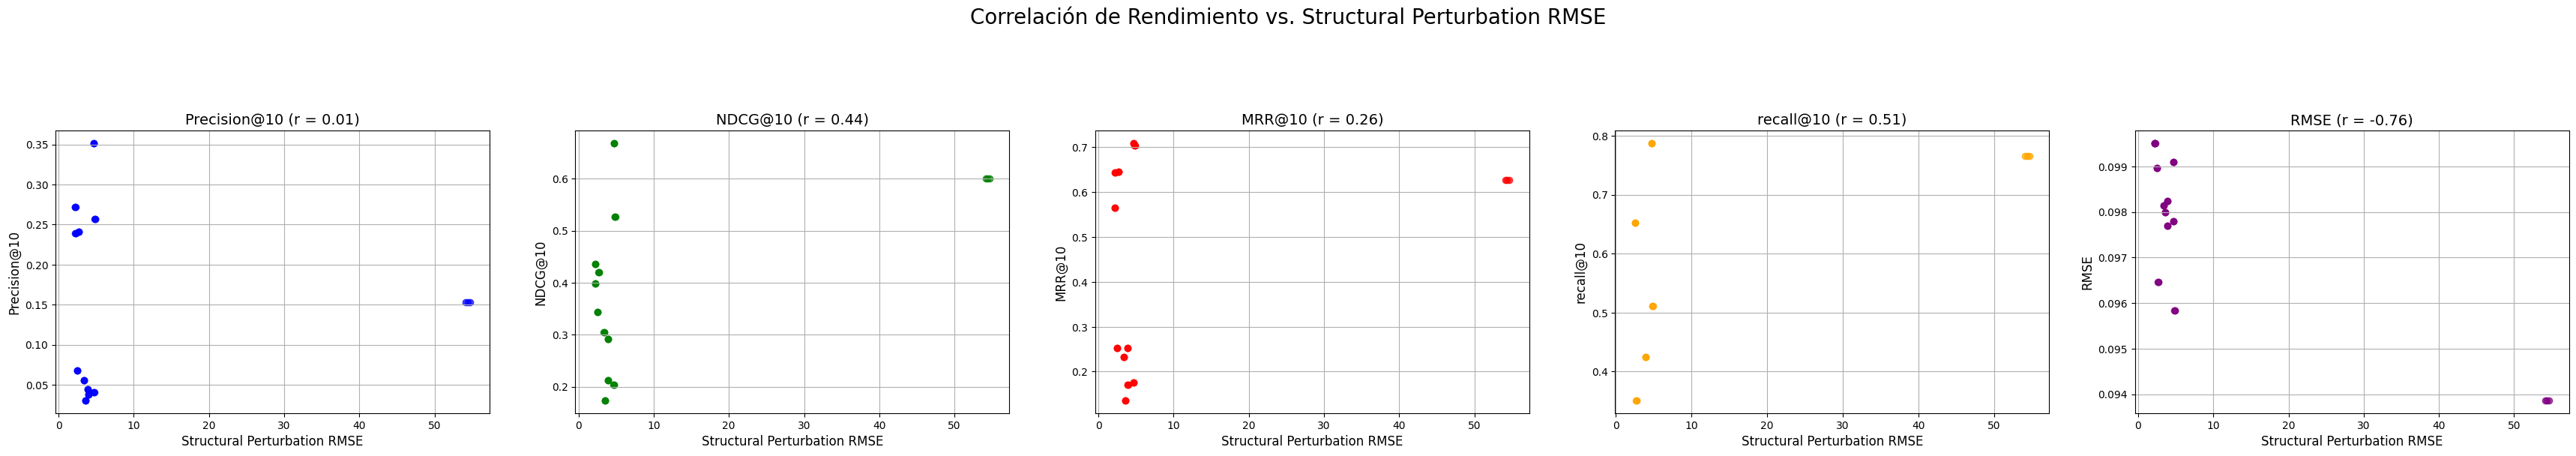

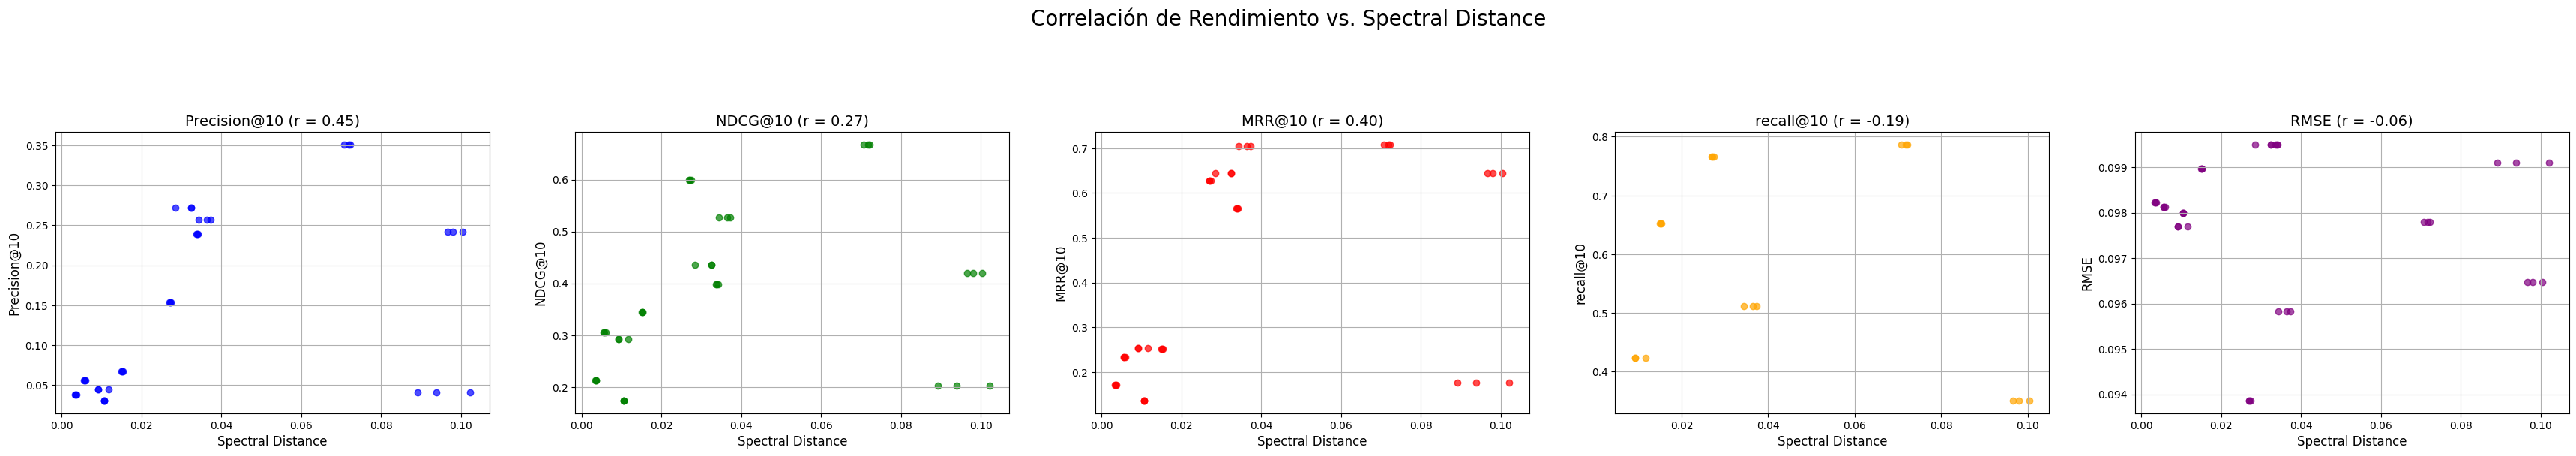

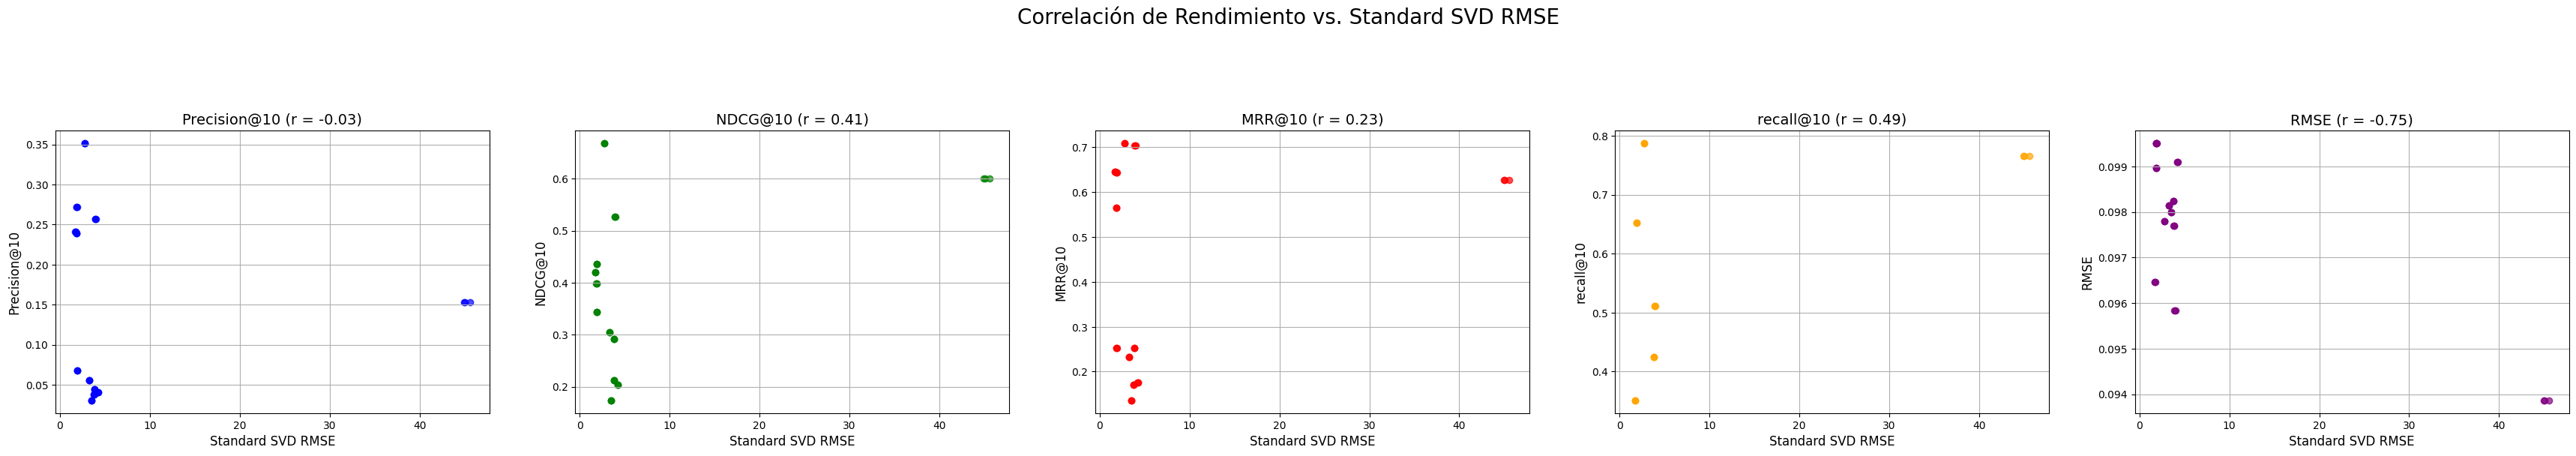

Advertencia: La métrica estructural 'Normalized RMSE' no se encontró en los datos. Saltando gráfico.


In [ ]:
## Sin postprocesamiento de Nans o ratings y sin Normalizar
## Grafico de correlaciones entre metricas estructurales y rendimiento, ejecutar despues de tener los resultados de perturbacion y benchmarks
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from scipy.stats import pearsonr

# Cargar las metricas de perturbacion de cada dataset
try:
    perturbation_df = pd.read_csv('./structural_perturbation/perturbation_results.csv')
    # Limpiar el nombre del dataset para que coincida
    perturbation_df['dataset_name'] = perturbation_df['dataset'].str.replace('.inter', '')
    print(f"Cargadas {len(perturbation_df)} filas de resultados de perturbación.")
except FileNotFoundError:
    print("Error: No se encontró el archivo 'structural_perturbation/perturbation_results.csv'.")

# Cargar las mejores metricas de rendimiento de los benchmarks
benchmark_results_dir = './latex/'
performance_metrics = []

for _,row in perturbation_df.iterrows():
    dataset_name = row['dataset_name']
    base_dataset_name = dataset_name.split('_sample')[0]    # correcion momentanea, como los samples se promediaron por ahora usaran el mismo.
    benchmark_file = os.path.join(benchmark_results_dir, f"final_test_{base_dataset_name}_benchmark.csv")
    if os.path.exists(benchmark_file):
        try:
            df_benchmark = pd.read_csv(benchmark_file)
            
            # Extraer métricas de forma segura, usando NaN si no existen
            best_precision = df_benchmark['precision@10'].max() if 'precision@10' in df_benchmark.columns else np.nan
            best_ndcg = df_benchmark['ndcg@10'].max() if 'ndcg@10' in df_benchmark.columns else np.nan
            best_mrr = df_benchmark['mrr@10'].max() if 'mrr@10' in df_benchmark.columns else np.nan
            best_recall = df_benchmark['recall@10'].max() if 'recall@10' in df_benchmark.columns else np.nan
            best_rmse = df_benchmark['rmse'].min() if 'rmse' in df_benchmark.columns else np.nan

            performance_metrics.append({
                'dataset_name': dataset_name,
                'Precision@10': best_precision,
                'NDCG@10': best_ndcg,
                'MRR@10': best_mrr,
                'recall@10': best_recall,
                'RMSE': best_rmse
            })
        except Exception as e:
            print(f"Advertencia: No se pudo procesar el archivo {benchmark_file}: {e}")
    else:
        print(f"Advertencia: No se encontró el archivo de benchmark para {dataset_name} en {benchmark_file}")
    
performance_df = pd.DataFrame(performance_metrics)
print(f"Procesados {len(performance_df)} archivos de benchmark con éxito.")

# Unir las métricas de perturbación con las de rendimiento
if not performance_df.empty:
    merged_df = pd.merge(perturbation_df, performance_df, on='dataset_name')
    print(f"Se unieron {len(merged_df)} datasets con sus métricas de rendimiento y perturbación.")

    # Graficar las correlaciones
    # Usaremos 'Spectral Distance' como la métrica de "Structural Perturbation" en el eje X
    # Métricas estructurales que irán en el eje X
    structural_metrics = [
        'Structural Perturbation RMSE', 
        'Spectral Distance', 
        'Standard SVD RMSE'
    ]
    performance_metrics_to_plot = ['Precision@10', 'NDCG@10', 'MRR@10','recall@10', 'RMSE']
    colors = ['blue', 'green', 'red','orange','purple']
    
    for x_metric in structural_metrics:
        if x_metric not in merged_df.columns:
            print(f"Advertencia: La métrica estructural '{x_metric}' no se encontró en los datos. Saltando gráfico.")
            continue

        # Crear una nueva figura para la métrica estructural actual
        fig, axes = plt.subplots(1, 5, figsize=(35, 6))
        fig.suptitle(f'Correlación de Rendimiento vs. {x_metric}', fontsize=20, y=1.05)
        
        # Aplanar el array de ejes para iterar fácilmente
        axes = axes.flatten()

        for i, (y_metric, color) in enumerate(zip(performance_metrics_to_plot, colors)):
            ax = axes[i]
            if y_metric in merged_df.columns:
                # Eliminar filas con valores NaN o Inf para el cálculo de correlación
                clean_df = merged_df[[x_metric, y_metric]].dropna()
                clean_df = clean_df[~clean_df.isin([np.inf, -np.inf]).any(axis=1)]

                # Calcular correlación de Pearson
                if len(clean_df) > 1:
                    corr, _ = pearsonr(clean_df[x_metric], clean_df[y_metric])
                else:
                    corr = float('nan')
                
                # Graficar
                ax.scatter(merged_df[x_metric], merged_df[y_metric], alpha=0.7, color=color)
                
                # Estilo y etiquetas
                ax.set_title(f'{y_metric} (r = {corr:.2f})', fontsize=14)
                ax.set_xlabel(x_metric, fontsize=12)
                ax.set_ylabel(y_metric, fontsize=12)
                ax.grid(True)
            else:
                ax.set_title(f'{y_metric} no encontrado')
                ax.text(0.5, 0.5, 'Datos no disponibles', ha='center', va='center')

        plt.tight_layout(pad=3.0)
        plt.show()
else:
    print("\nNo se pudo generar gráficos porque no se encontraron datos de rendimiento.")


Cargadas 36 filas de resultados de perturbación.
Procesados 36 archivos de benchmark con éxito.
Se unieron 36 datasets con sus métricas de rendimiento y perturbación.


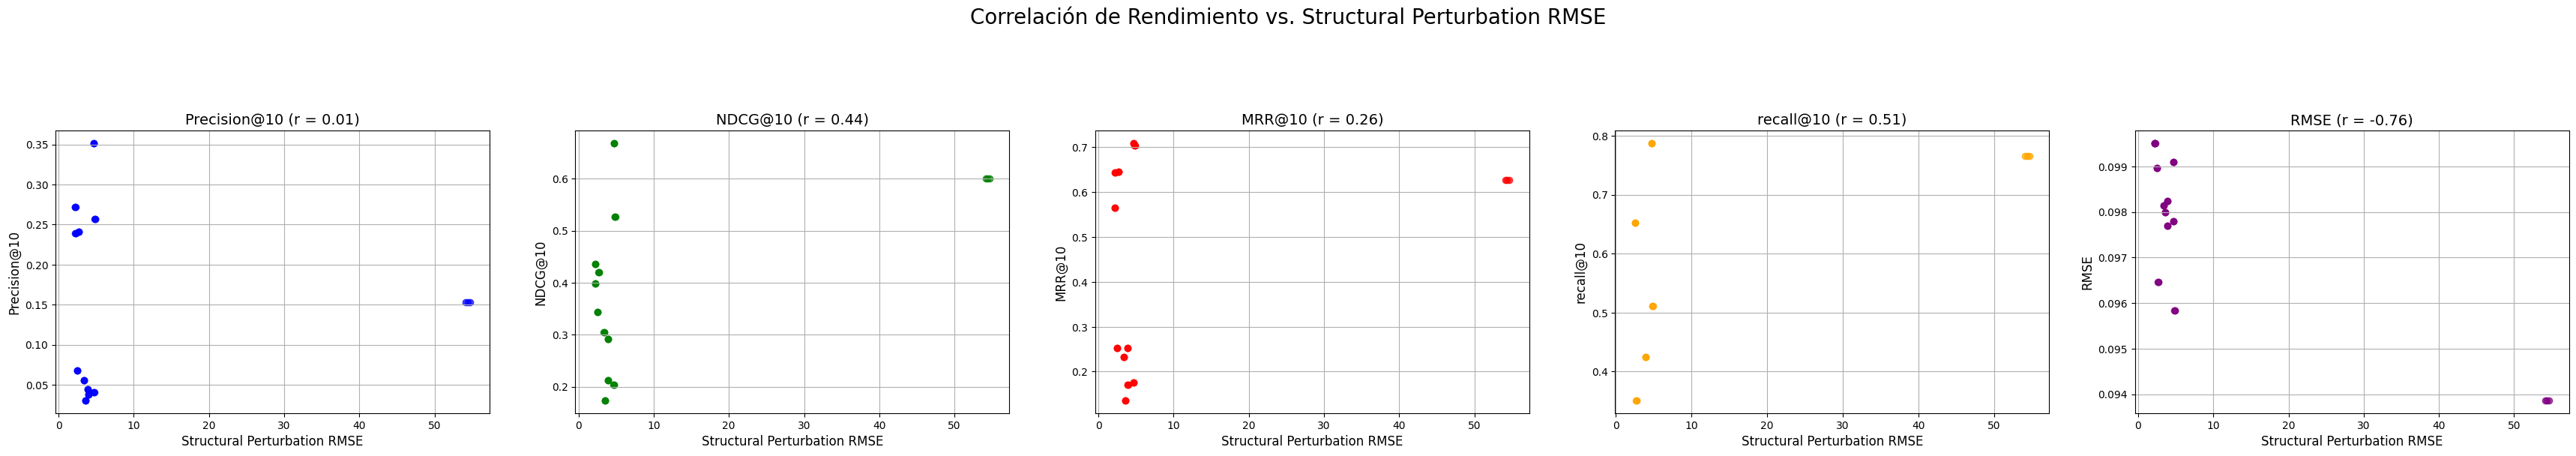

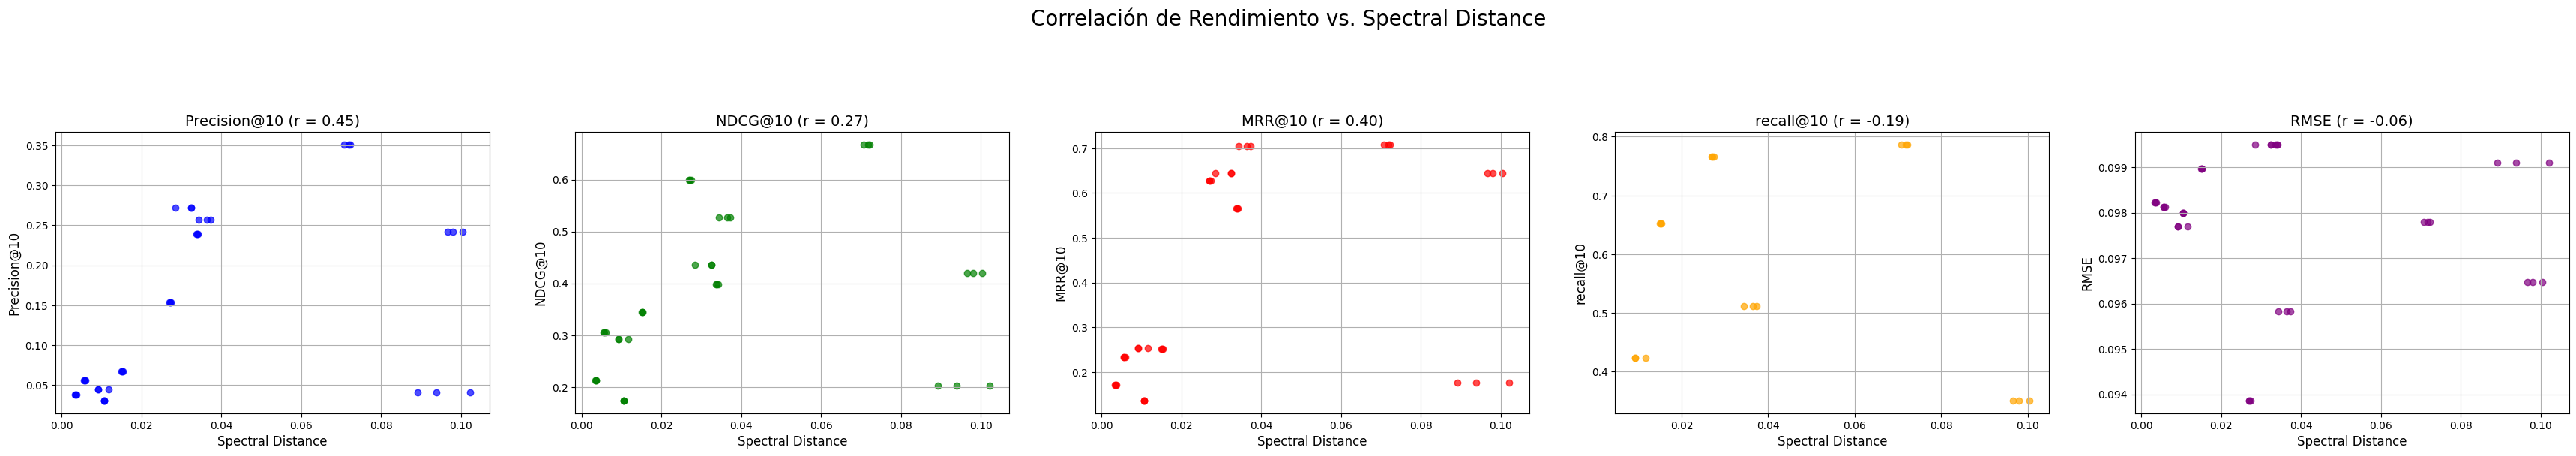

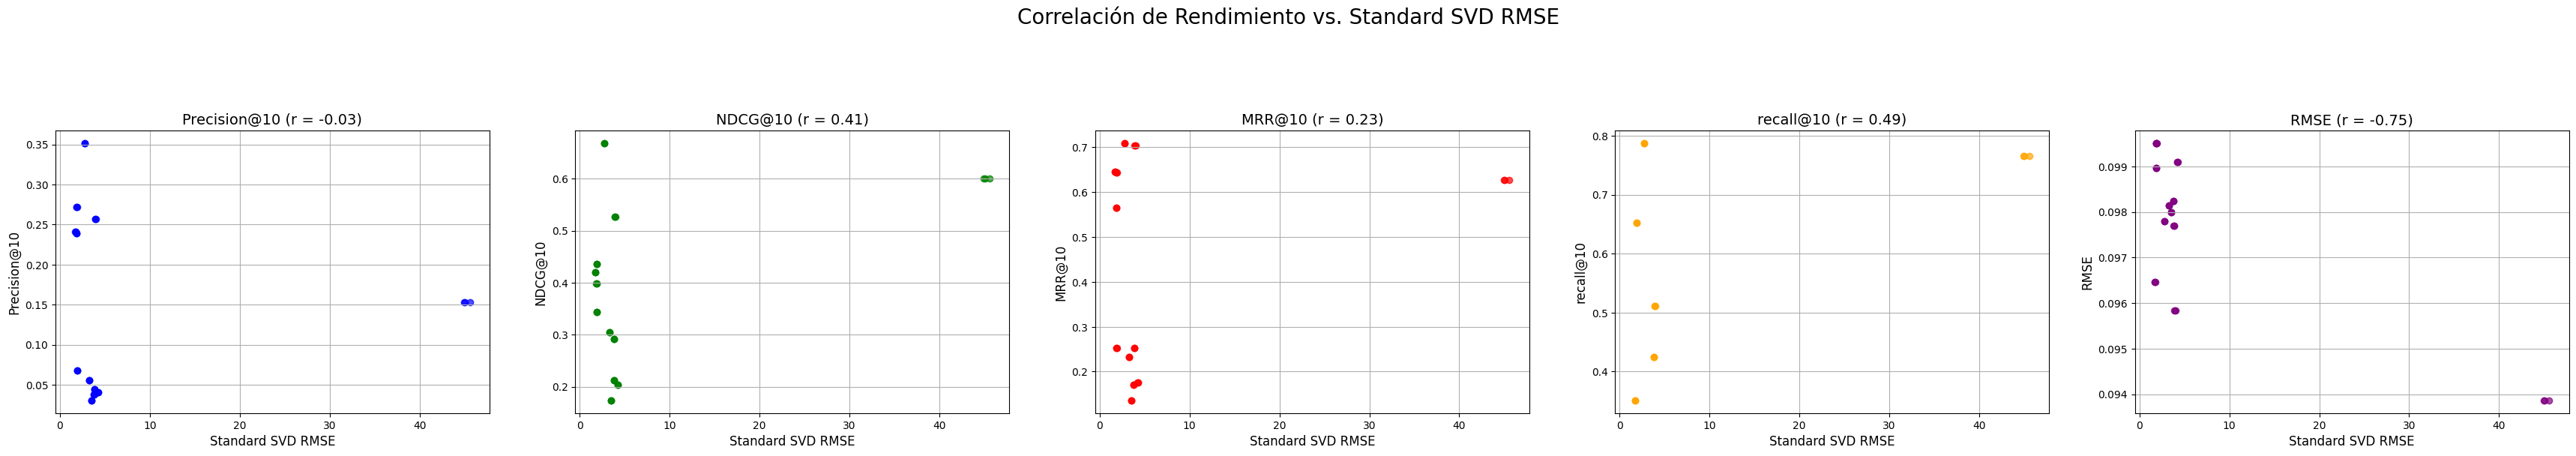

Advertencia: La métrica estructural 'Normalized RMSE' no se encontró en los datos. Saltando gráfico.


In [4]:
## Sin postprocesamiento de Nans o ratings y Normalizando los ratings [0,1]
## Grafico de correlaciones entre metricas estructurales y rendimiento, ejecutar despues de tener los resultados de perturbacion y benchmarks
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from scipy.stats import pearsonr

# Cargar las metricas de perturbacion de cada dataset
try:
    perturbation_df = pd.read_csv('./structural_perturbation/perturbation_results.csv')
    # Limpiar el nombre del dataset para que coincida
    perturbation_df['dataset_name'] = perturbation_df['dataset'].str.replace('.inter', '')
    print(f"Cargadas {len(perturbation_df)} filas de resultados de perturbación.")
except FileNotFoundError:
    print("Error: No se encontró el archivo 'structural_perturbation/perturbation_results.csv'.")

# Cargar las mejores metricas de rendimiento de los benchmarks
benchmark_results_dir = './latex/'
performance_metrics = []

for _,row in perturbation_df.iterrows():
    dataset_name = row['dataset_name']
    base_dataset_name = dataset_name.split('_sample')[0]    # correcion momentanea, como los samples se promediaron por ahora usaran el mismo.
    benchmark_file = os.path.join(benchmark_results_dir, f"final_test_{base_dataset_name}_benchmark.csv")
    if os.path.exists(benchmark_file):
        try:
            df_benchmark = pd.read_csv(benchmark_file)
            
            # Extraer métricas de forma segura, usando NaN si no existen
            best_precision = df_benchmark['precision@10'].max() if 'precision@10' in df_benchmark.columns else np.nan
            best_ndcg = df_benchmark['ndcg@10'].max() if 'ndcg@10' in df_benchmark.columns else np.nan
            best_mrr = df_benchmark['mrr@10'].max() if 'mrr@10' in df_benchmark.columns else np.nan
            best_recall = df_benchmark['recall@10'].max() if 'recall@10' in df_benchmark.columns else np.nan
            best_rmse = df_benchmark['rmse'].min() if 'rmse' in df_benchmark.columns else np.nan

            performance_metrics.append({
                'dataset_name': dataset_name,
                'Precision@10': best_precision,
                'NDCG@10': best_ndcg,
                'MRR@10': best_mrr,
                'recall@10': best_recall,
                'RMSE': best_rmse
            })
        except Exception as e:
            print(f"Advertencia: No se pudo procesar el archivo {benchmark_file}: {e}")
    else:
        print(f"Advertencia: No se encontró el archivo de benchmark para {dataset_name} en {benchmark_file}")
    
performance_df = pd.DataFrame(performance_metrics)
print(f"Procesados {len(performance_df)} archivos de benchmark con éxito.")

# Unir las métricas de perturbación con las de rendimiento
if not performance_df.empty:
    merged_df = pd.merge(perturbation_df, performance_df, on='dataset_name')
    print(f"Se unieron {len(merged_df)} datasets con sus métricas de rendimiento y perturbación.")

    # Graficar las correlaciones
    # Usaremos 'Spectral Distance' como la métrica de "Structural Perturbation" en el eje X
    # Métricas estructurales que irán en el eje X
    structural_metrics = [
        'Structural Perturbation RMSE', 
        'Spectral Distance', 
        'Standard SVD RMSE', 
        'Normalized RMSE'
    ]
    performance_metrics_to_plot = ['Precision@10', 'NDCG@10', 'MRR@10','recall@10', 'RMSE']
    colors = ['blue', 'green', 'red','orange','purple']
    
    for x_metric in structural_metrics:
        if x_metric not in merged_df.columns:
            print(f"Advertencia: La métrica estructural '{x_metric}' no se encontró en los datos. Saltando gráfico.")
            continue

        # Crear una nueva figura para la métrica estructural actual
        fig, axes = plt.subplots(1, 5, figsize=(35, 6))
        fig.suptitle(f'Correlación de Rendimiento vs. {x_metric}', fontsize=20, y=1.05)
        
        # Aplanar el array de ejes para iterar fácilmente
        axes = axes.flatten()

        for i, (y_metric, color) in enumerate(zip(performance_metrics_to_plot, colors)):
            ax = axes[i]
            if y_metric in merged_df.columns:
                # Eliminar filas con valores NaN o Inf para el cálculo de correlación
                clean_df = merged_df[[x_metric, y_metric]].dropna()
                clean_df = clean_df[~clean_df.isin([np.inf, -np.inf]).any(axis=1)]

                # Calcular correlación de Pearson
                if len(clean_df) > 1:
                    corr, _ = pearsonr(clean_df[x_metric], clean_df[y_metric])
                else:
                    corr = float('nan')
                
                # Graficar
                ax.scatter(merged_df[x_metric], merged_df[y_metric], alpha=0.7, color=color)
                
                # Estilo y etiquetas
                ax.set_title(f'{y_metric} (r = {corr:.2f})', fontsize=14)
                ax.set_xlabel(x_metric, fontsize=12)
                ax.set_ylabel(y_metric, fontsize=12)
                ax.grid(True)
            else:
                ax.set_title(f'{y_metric} no encontrado')
                ax.text(0.5, 0.5, 'Datos no disponibles', ha='center', va='center')

        plt.tight_layout(pad=3.0)
        plt.show()
else:
    print("\nNo se pudo generar gráficos porque no se encontraron datos de rendimiento.")


Cargadas 58 filas de resultados de perturbación.
Procesados 58 archivos de benchmark con éxito.
Se unieron 58 datasets con sus métricas de rendimiento y perturbación.


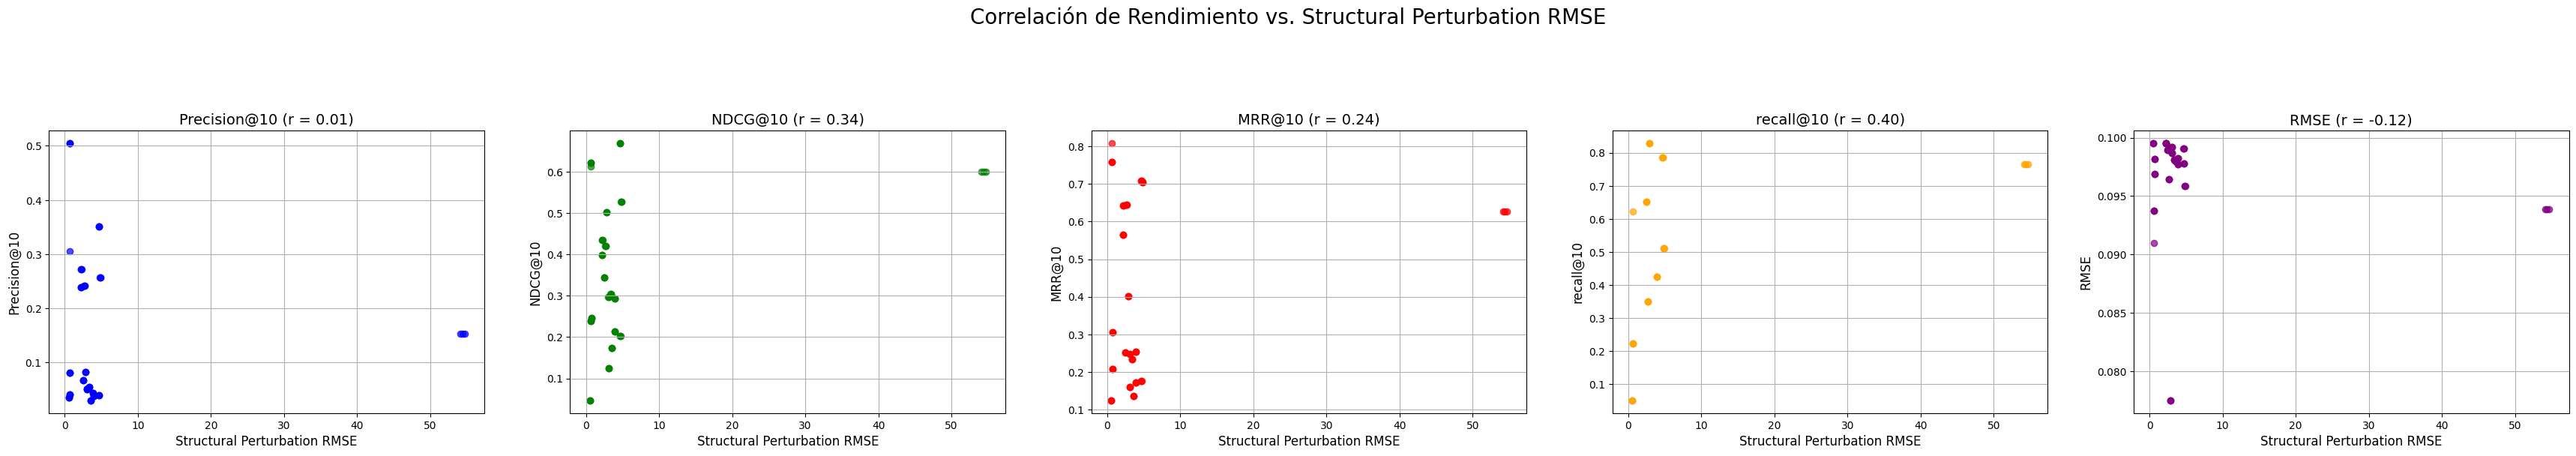

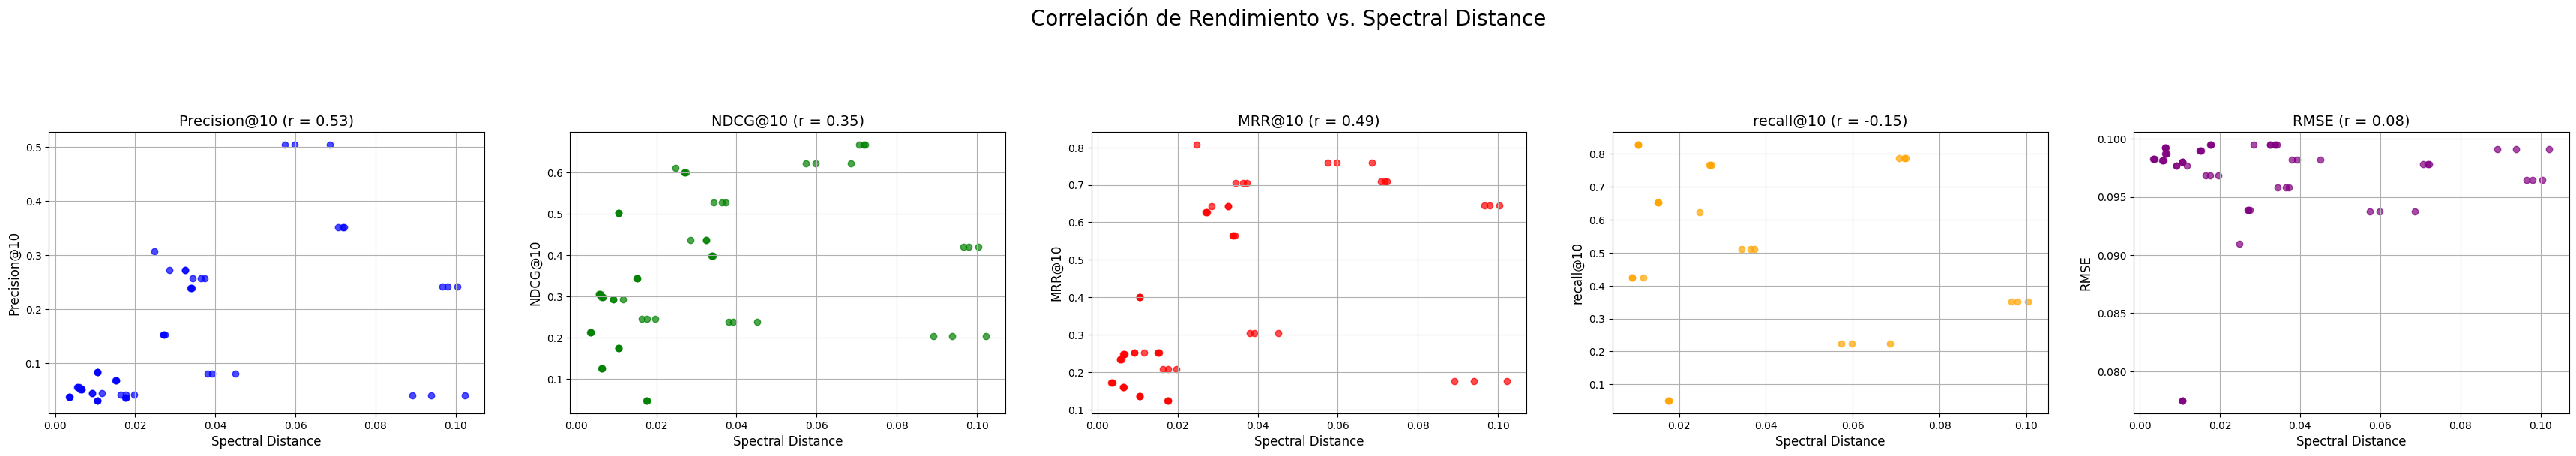

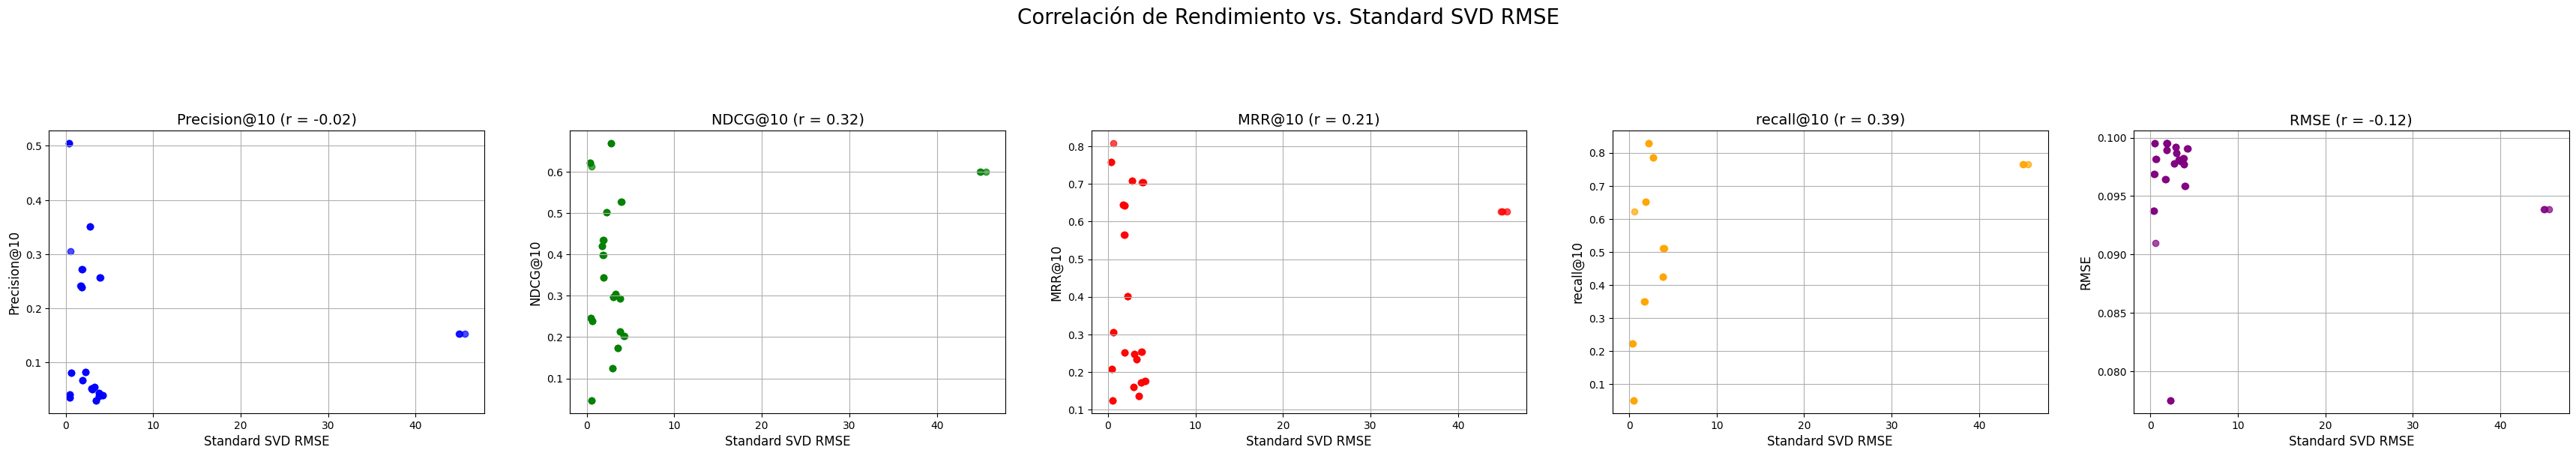

In [18]:
## con postprocesamiento de Nans o ratings y sin Normalizar
## Grafico de correlaciones entre metricas estructurales y rendimiento, ejecutar despues de tener los resultados de perturbacion y benchmarks
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from scipy.stats import pearsonr

# Cargar las metricas de perturbacion de cada dataset
try:
    perturbation_df = pd.read_csv('./structural_perturbation/perturbation_results.csv')
    # Limpiar el nombre del dataset para que coincida
    perturbation_df['dataset_name'] = perturbation_df['dataset'].str.replace('.inter', '')
    print(f"Cargadas {len(perturbation_df)} filas de resultados de perturbación.")
except FileNotFoundError:
    print("Error: No se encontró el archivo 'structural_perturbation/perturbation_results.csv'.")

# Cargar las mejores metricas de rendimiento de los benchmarks
benchmark_results_dir = './latex/'
performance_metrics = []

for _,row in perturbation_df.iterrows():
    dataset_name = row['dataset_name']
    base_dataset_name = dataset_name.split('_sample')[0]    # correcion momentanea, como los samples se promediaron por ahora usaran el mismo.
    benchmark_file = os.path.join(benchmark_results_dir, f"final_test_{base_dataset_name}_benchmark.csv")
    if os.path.exists(benchmark_file):
        try:
            df_benchmark = pd.read_csv(benchmark_file)
            
            # Extraer métricas de forma segura, usando NaN si no existen
            best_precision = df_benchmark['precision@10'].max() if 'precision@10' in df_benchmark.columns else np.nan
            best_ndcg = df_benchmark['ndcg@10'].max() if 'ndcg@10' in df_benchmark.columns else np.nan
            best_mrr = df_benchmark['mrr@10'].max() if 'mrr@10' in df_benchmark.columns else np.nan
            best_recall = df_benchmark['recall@10'].max() if 'recall@10' in df_benchmark.columns else np.nan
            best_rmse = df_benchmark['rmse'].min() if 'rmse' in df_benchmark.columns else np.nan

            performance_metrics.append({
                'dataset_name': dataset_name,
                'Precision@10': best_precision,
                'NDCG@10': best_ndcg,
                'MRR@10': best_mrr,
                'recall@10': best_recall,
                'RMSE': best_rmse
            })
        except Exception as e:
            print(f"Advertencia: No se pudo procesar el archivo {benchmark_file}: {e}")
    else:
        print(f"Advertencia: No se encontró el archivo de benchmark para {dataset_name} en {benchmark_file}")
    
performance_df = pd.DataFrame(performance_metrics)
print(f"Procesados {len(performance_df)} archivos de benchmark con éxito.")

# Unir las métricas de perturbación con las de rendimiento
if not performance_df.empty:
    merged_df = pd.merge(perturbation_df, performance_df, on='dataset_name')
    print(f"Se unieron {len(merged_df)} datasets con sus métricas de rendimiento y perturbación.")

    # Graficar las correlaciones
    # Usaremos 'Spectral Distance' como la métrica de "Structural Perturbation" en el eje X
    # Métricas estructurales que irán en el eje X
    structural_metrics = [
        'Structural Perturbation RMSE', 
        'Spectral Distance', 
        'Standard SVD RMSE',
    ]
    performance_metrics_to_plot = ['Precision@10', 'NDCG@10', 'MRR@10','recall@10', 'RMSE']
    colors = ['blue', 'green', 'red','orange','purple']
    
    for x_metric in structural_metrics:
        if x_metric not in merged_df.columns:
            print(f"Advertencia: La métrica estructural '{x_metric}' no se encontró en los datos. Saltando gráfico.")
            continue

        # Crear una nueva figura para la métrica estructural actual
        fig, axes = plt.subplots(1, 5, figsize=(35, 6))
        fig.suptitle(f'Correlación de Rendimiento vs. {x_metric}', fontsize=20, y=1.05)
        
        # Aplanar el array de ejes para iterar fácilmente
        axes = axes.flatten()

        for i, (y_metric, color) in enumerate(zip(performance_metrics_to_plot, colors)):
            ax = axes[i]
            if y_metric in merged_df.columns:
                # Eliminar filas con valores NaN o Inf para el cálculo de correlación
                clean_df = merged_df[[x_metric, y_metric]].dropna()
                clean_df = clean_df[~clean_df.isin([np.inf, -np.inf]).any(axis=1)]

                # Calcular correlación de Pearson
                if len(clean_df) > 1:
                    corr, _ = pearsonr(clean_df[x_metric], clean_df[y_metric])
                else:
                    corr = float('nan')
                
                # Graficar
                ax.scatter(merged_df[x_metric], merged_df[y_metric], alpha=0.7, color=color)
                
                # Estilo y etiquetas
                ax.set_title(f'{y_metric} (r = {corr:.2f})', fontsize=14)
                ax.set_xlabel(x_metric, fontsize=12)
                ax.set_ylabel(y_metric, fontsize=12)
                ax.grid(True)
            else:
                ax.set_title(f'{y_metric} no encontrado')
                ax.text(0.5, 0.5, 'Datos no disponibles', ha='center', va='center')

        plt.tight_layout(pad=3.0)
        plt.show()
else:
    print("\nNo se pudo generar gráficos porque no se encontraron datos de rendimiento.")


Cargadas 58 filas de resultados de perturbación.
Procesados 58 archivos de benchmark con éxito.
Se unieron 58 datasets con sus métricas de rendimiento y perturbación.


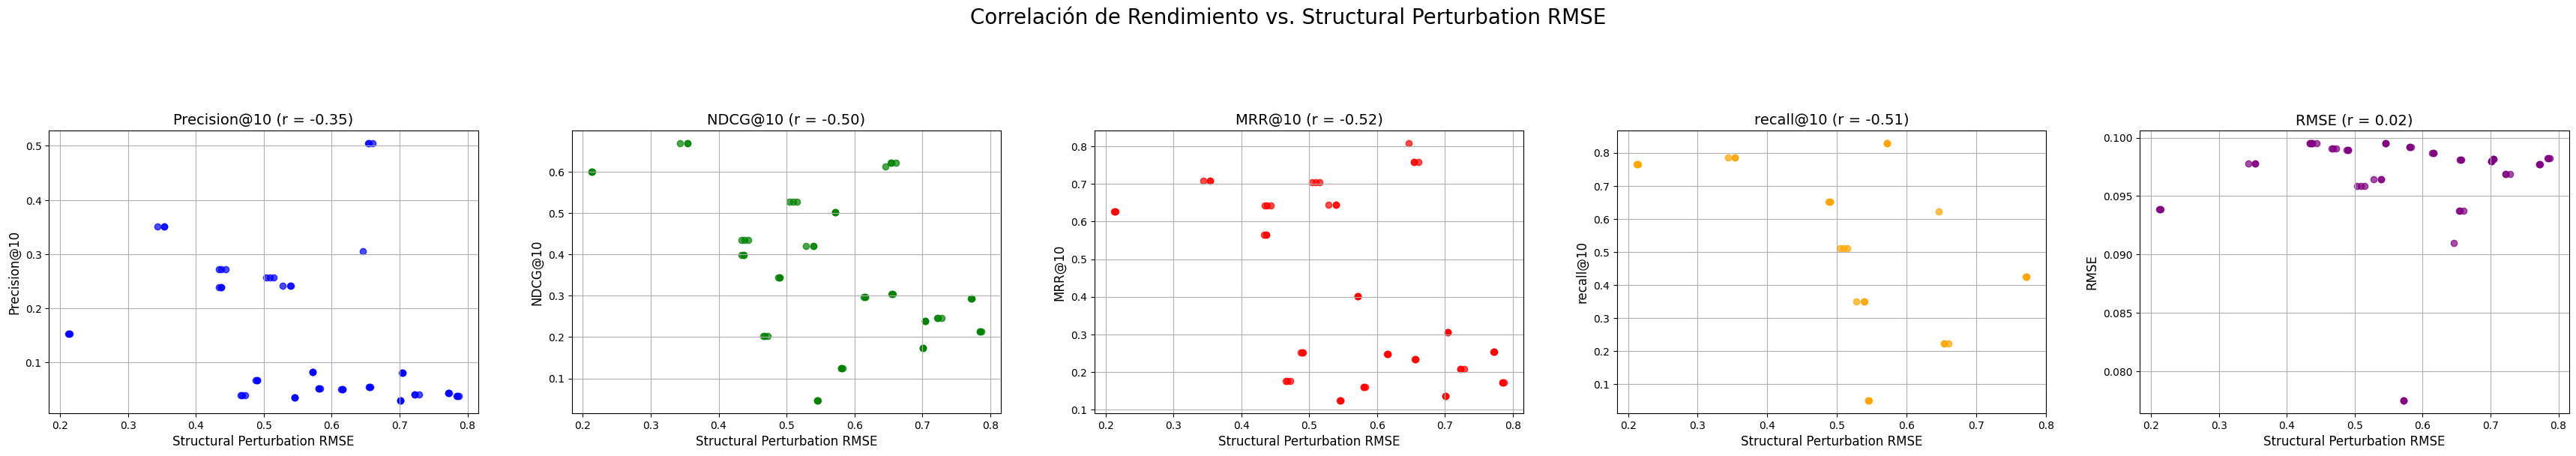

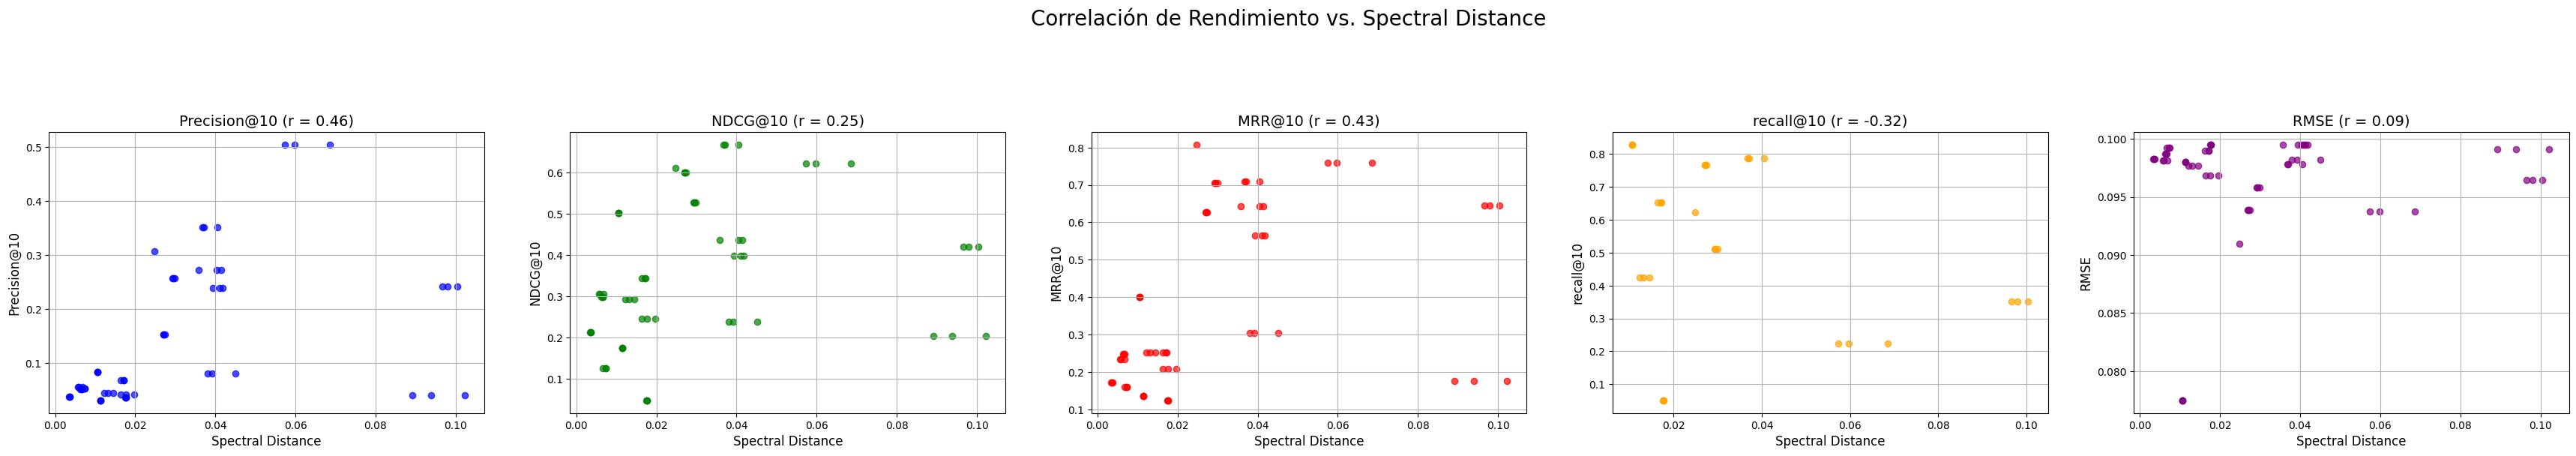

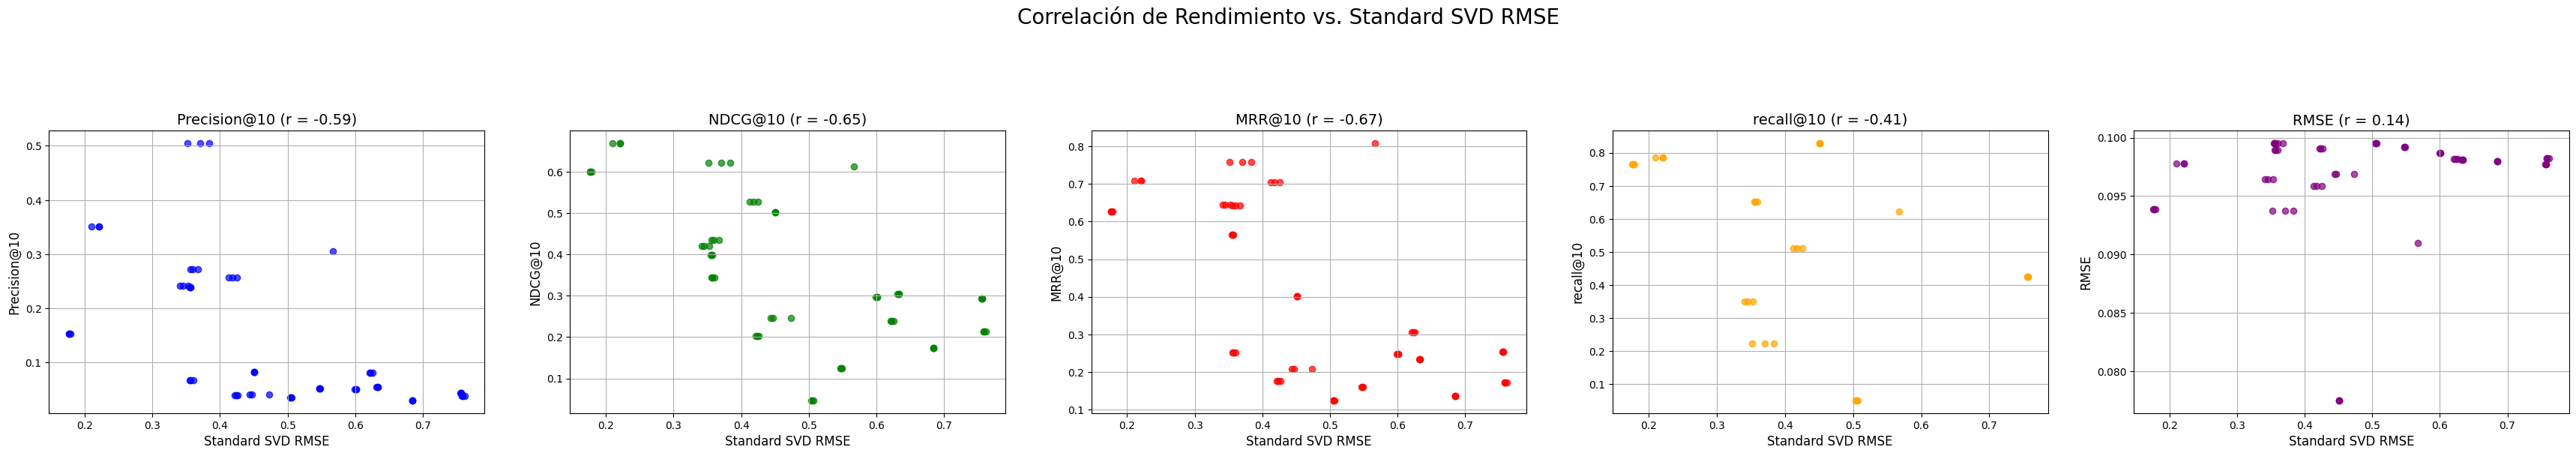

In [20]:
## Con postprocesamiento de Nans o ratings y con Normalizar
## Grafico de correlaciones entre metricas estructurales y rendimiento, ejecutar despues de tener los resultados de perturbacion y benchmarks
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from scipy.stats import pearsonr

# Cargar las metricas de perturbacion de cada dataset
try:
    perturbation_df = pd.read_csv('./structural_perturbation/perturbation_results.csv')
    # Limpiar el nombre del dataset para que coincida
    perturbation_df['dataset_name'] = perturbation_df['dataset'].str.replace('.inter', '')
    print(f"Cargadas {len(perturbation_df)} filas de resultados de perturbación.")
except FileNotFoundError:
    print("Error: No se encontró el archivo 'structural_perturbation/perturbation_results.csv'.")

# Cargar las mejores metricas de rendimiento de los benchmarks
benchmark_results_dir = './latex/'
performance_metrics = []

for _,row in perturbation_df.iterrows():
    dataset_name = row['dataset_name']
    base_dataset_name = dataset_name.split('_sample')[0]    # correcion momentanea, como los samples se promediaron por ahora usaran el mismo.
    benchmark_file = os.path.join(benchmark_results_dir, f"final_test_{base_dataset_name}_benchmark.csv")
    if os.path.exists(benchmark_file):
        try:
            df_benchmark = pd.read_csv(benchmark_file)
            
            # Extraer métricas de forma segura, usando NaN si no existen
            best_precision = df_benchmark['precision@10'].max() if 'precision@10' in df_benchmark.columns else np.nan
            best_ndcg = df_benchmark['ndcg@10'].max() if 'ndcg@10' in df_benchmark.columns else np.nan
            best_mrr = df_benchmark['mrr@10'].max() if 'mrr@10' in df_benchmark.columns else np.nan
            best_recall = df_benchmark['recall@10'].max() if 'recall@10' in df_benchmark.columns else np.nan
            best_rmse = df_benchmark['rmse'].min() if 'rmse' in df_benchmark.columns else np.nan

            performance_metrics.append({
                'dataset_name': dataset_name,
                'Precision@10': best_precision,
                'NDCG@10': best_ndcg,
                'MRR@10': best_mrr,
                'recall@10': best_recall,
                'RMSE': best_rmse
            })
        except Exception as e:
            print(f"Advertencia: No se pudo procesar el archivo {benchmark_file}: {e}")
    else:
        print(f"Advertencia: No se encontró el archivo de benchmark para {dataset_name} en {benchmark_file}")
    
performance_df = pd.DataFrame(performance_metrics)
print(f"Procesados {len(performance_df)} archivos de benchmark con éxito.")

# Unir las métricas de perturbación con las de rendimiento
if not performance_df.empty:
    merged_df = pd.merge(perturbation_df, performance_df, on='dataset_name')
    print(f"Se unieron {len(merged_df)} datasets con sus métricas de rendimiento y perturbación.")

    # Graficar las correlaciones
    # Usaremos 'Spectral Distance' como la métrica de "Structural Perturbation" en el eje X
    # Métricas estructurales que irán en el eje X
    structural_metrics = [
        'Structural Perturbation RMSE', 
        'Spectral Distance', 
        'Standard SVD RMSE',
    ]
    performance_metrics_to_plot = ['Precision@10', 'NDCG@10', 'MRR@10','recall@10', 'RMSE']
    colors = ['blue', 'green', 'red','orange','purple']
    
    for x_metric in structural_metrics:
        if x_metric not in merged_df.columns:
            print(f"Advertencia: La métrica estructural '{x_metric}' no se encontró en los datos. Saltando gráfico.")
            continue

        # Crear una nueva figura para la métrica estructural actual
        fig, axes = plt.subplots(1, 5, figsize=(35, 6))
        fig.suptitle(f'Correlación de Rendimiento vs. {x_metric}', fontsize=20, y=1.05)
        
        # Aplanar el array de ejes para iterar fácilmente
        axes = axes.flatten()

        for i, (y_metric, color) in enumerate(zip(performance_metrics_to_plot, colors)):
            ax = axes[i]
            if y_metric in merged_df.columns:
                # Eliminar filas con valores NaN o Inf para el cálculo de correlación
                clean_df = merged_df[[x_metric, y_metric]].dropna()
                clean_df = clean_df[~clean_df.isin([np.inf, -np.inf]).any(axis=1)]

                # Calcular correlación de Pearson
                if len(clean_df) > 1:
                    corr, _ = pearsonr(clean_df[x_metric], clean_df[y_metric])
                else:
                    corr = float('nan')
                
                # Graficar
                ax.scatter(merged_df[x_metric], merged_df[y_metric], alpha=0.7, color=color)
                
                # Estilo y etiquetas
                ax.set_title(f'{y_metric} (r = {corr:.2f})', fontsize=14)
                ax.set_xlabel(x_metric, fontsize=12)
                ax.set_ylabel(y_metric, fontsize=12)
                ax.grid(True)
            else:
                ax.set_title(f'{y_metric} no encontrado')
                ax.text(0.5, 0.5, 'Datos no disponibles', ha='center', va='center')

        plt.tight_layout(pad=3.0)
        plt.show()
else:
    print("\nNo se pudo generar gráficos porque no se encontraron datos de rendimiento.")


Cargadas 36 filas de resultados de perturbación.
Procesados 36 archivos de benchmark con éxito.
Se unieron 36 datasets con sus métricas de rendimiento y perturbación.
--> FILTRADO APLICADO: Se graficarán 15 puntos (de 36 originales) correspondientes a: ['ml-1m', 'amazon_digital_music', 'food', 'netflix', 'yelp']


/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


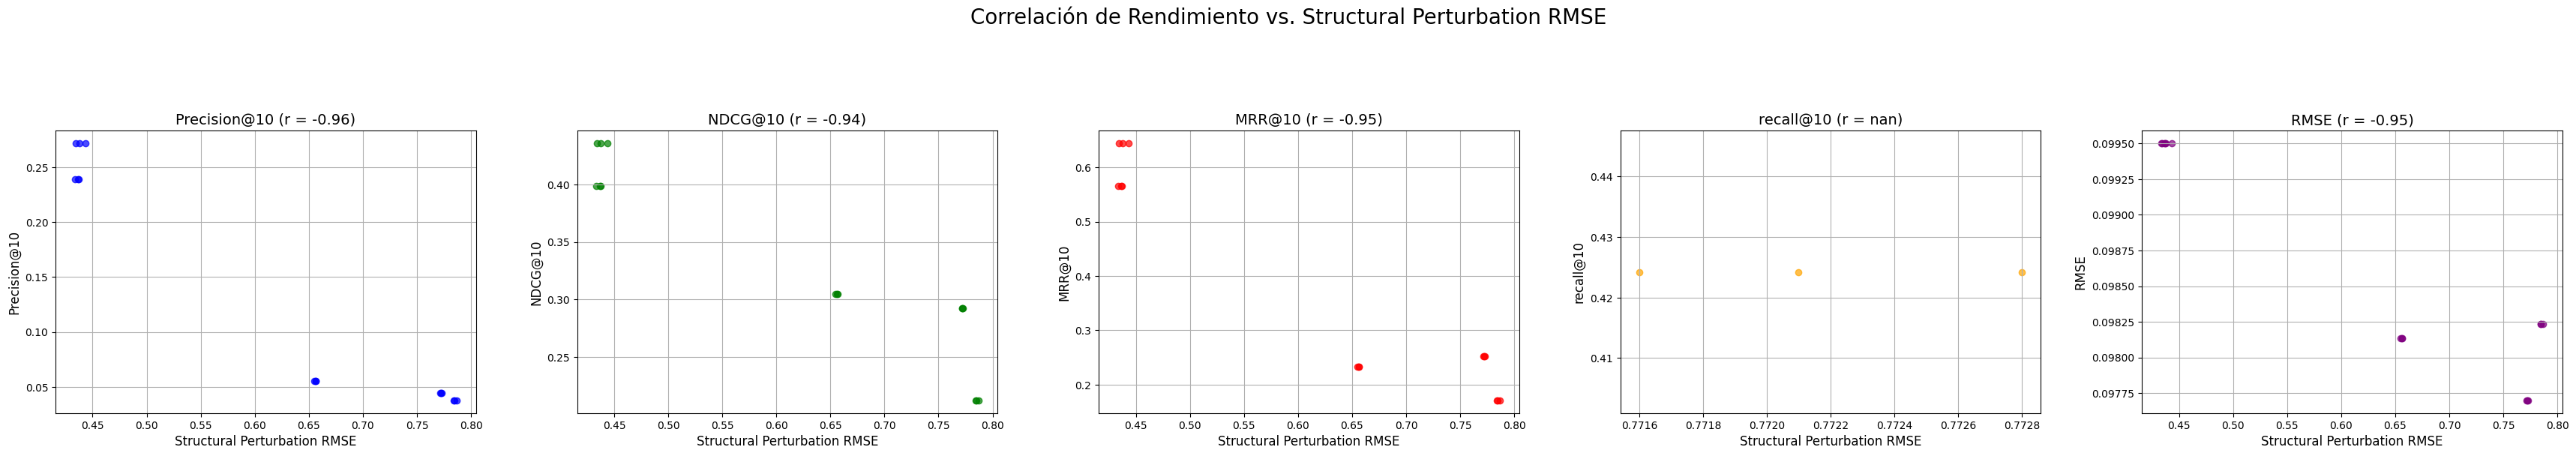

/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


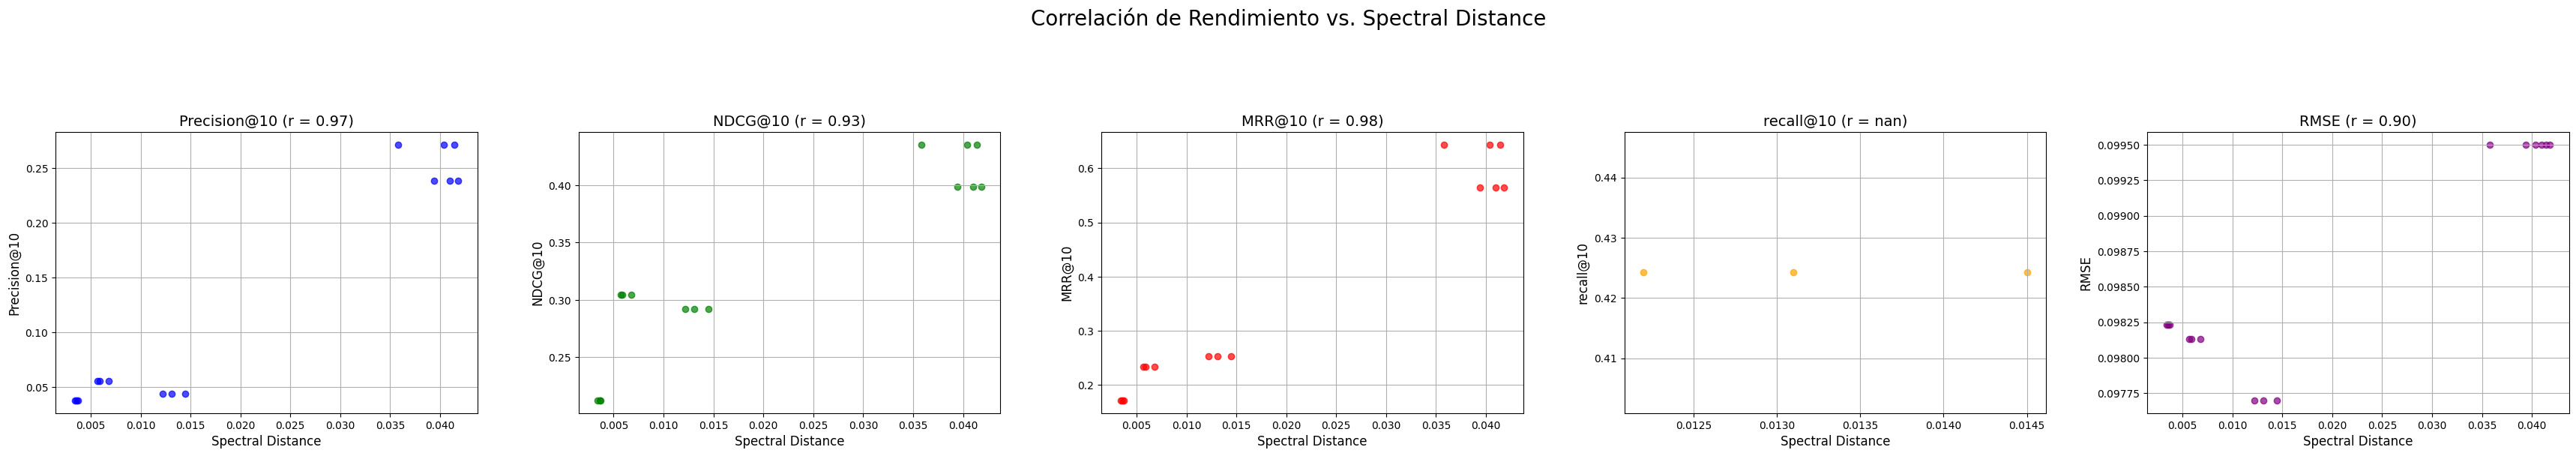

/home/c-moon/Desktop/abeliuk/venv/lib/python3.12/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


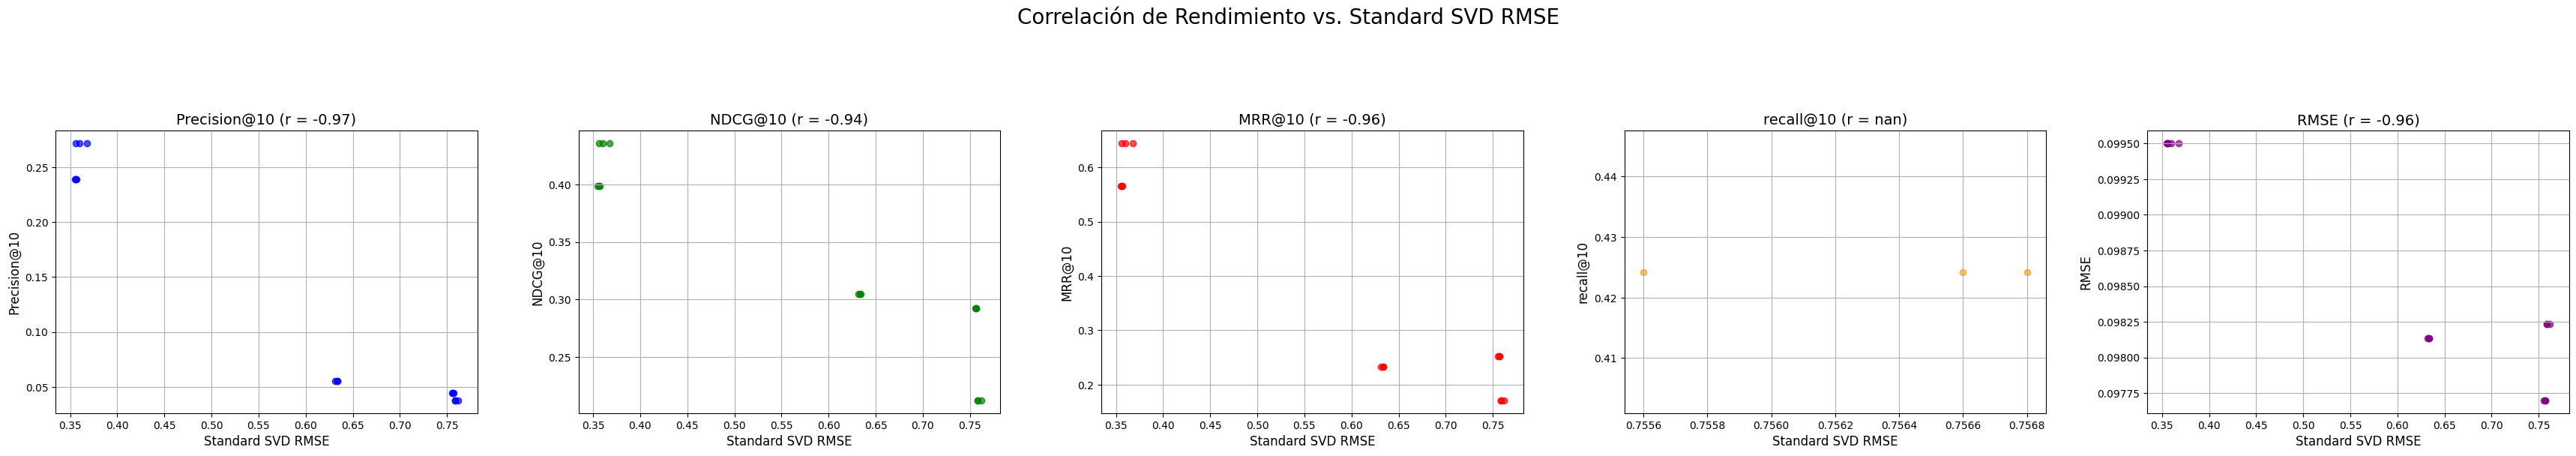

Advertencia: La métrica estructural 'Normalized RMSE' no se encontró en los datos. Saltando gráfico.


In [7]:
## Grafico de correlaciones entre metricas estructurales y rendimiento, ejecutar despues de tener los resultados de perturbacion y benchmarks
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from scipy.stats import pearsonr

# --- CONFIGURACIÓN DE FILTRADO ---
# Lista de datasets (nombres base) que quieres graficar.
# Asegúrate de usar el nombre base (ej: 'ml-100k' en lugar de 'ml-100k_sample1').
target_datasets = ['ml-1m','amazon_digital_music','food','netflix','yelp'] 
# ---------------------------------

# Cargar las metricas de perturbacion de cada dataset
try:
    perturbation_df = pd.read_csv('./structural_perturbation/perturbation_results.csv')
    # Limpiar el nombre del dataset para que coincida
    perturbation_df['dataset_name'] = perturbation_df['dataset'].str.replace('.inter', '')
    print(f"Cargadas {len(perturbation_df)} filas de resultados de perturbación.")
except FileNotFoundError:
    print("Error: No se encontró el archivo 'structural_perturbation/perturbation_results.csv'.")

# Cargar las mejores metricas de rendimiento de los benchmarks
benchmark_results_dir = './latex/'
performance_metrics = []

for _,row in perturbation_df.iterrows():
    dataset_name = row['dataset_name']
    base_dataset_name = dataset_name.split('_sample')[0]    # correcion momentanea, como los samples se promediaron por ahora usaran el mismo.
    benchmark_file = os.path.join(benchmark_results_dir, f"final_test_{base_dataset_name}_benchmark.csv")
    if os.path.exists(benchmark_file):
        try:
            df_benchmark = pd.read_csv(benchmark_file)
            
            # Extraer métricas de forma segura, usando NaN si no existen
            best_precision = df_benchmark['precision@10'].max() if 'precision@10' in df_benchmark.columns else np.nan
            best_ndcg = df_benchmark['ndcg@10'].max() if 'ndcg@10' in df_benchmark.columns else np.nan
            best_mrr = df_benchmark['mrr@10'].max() if 'mrr@10' in df_benchmark.columns else np.nan
            best_recall = df_benchmark['recall@10'].max() if 'recall@10' in df_benchmark.columns else np.nan
            best_rmse = df_benchmark['rmse'].min() if 'rmse' in df_benchmark.columns else np.nan

            performance_metrics.append({
                'dataset_name': dataset_name,
                'Precision@10': best_precision,
                'NDCG@10': best_ndcg,
                'MRR@10': best_mrr,
                'recall@10': best_recall,
                'RMSE': best_rmse
            })
        except Exception as e:
            print(f"Advertencia: No se pudo procesar el archivo {benchmark_file}: {e}")
    else:
        print(f"Advertencia: No se encontró el archivo de benchmark para {dataset_name} en {benchmark_file}")
    
performance_df = pd.DataFrame(performance_metrics)
print(f"Procesados {len(performance_df)} archivos de benchmark con éxito.")

# Unir las métricas de perturbación con las de rendimiento
if not performance_df.empty:
    merged_df = pd.merge(perturbation_df, performance_df, on='dataset_name')
    print(f"Se unieron {len(merged_df)} datasets con sus métricas de rendimiento y perturbación.")

    # --- APLICAR FILTRO POR LISTA DE DATASETS ---
    if target_datasets:
        # Crear columna temporal con el nombre base para filtrar
        merged_df['base_dataset_name'] = merged_df['dataset_name'].apply(lambda x: x.split('_sample')[0])
        
        # Filtrar el DataFrame
        original_count = len(merged_df)
        merged_df = merged_df[merged_df['base_dataset_name'].isin(target_datasets)]
        print(f"--> FILTRADO APLICADO: Se graficarán {len(merged_df)} puntos (de {original_count} originales) correspondientes a: {target_datasets}")
    # --------------------------------------------

    if merged_df.empty:
        print("Advertencia: El filtrado resultó en un DataFrame vacío. Revisa la lista 'target_datasets'.")
    else:
        # Graficar las correlaciones
        # Usaremos 'Spectral Distance' como la métrica de "Structural Perturbation" en el eje X
        # Métricas estructurales que irán en el eje X
        structural_metrics = [
            'Structural Perturbation RMSE', 
            'Spectral Distance', 
            'Standard SVD RMSE', 
            'Normalized RMSE'
        ]
        performance_metrics_to_plot = ['Precision@10', 'NDCG@10', 'MRR@10','recall@10', 'RMSE']
        colors = ['blue', 'green', 'red','orange','purple']
        
        for x_metric in structural_metrics:
            if x_metric not in merged_df.columns:
                print(f"Advertencia: La métrica estructural '{x_metric}' no se encontró en los datos. Saltando gráfico.")
                continue

            # Crear una nueva figura para la métrica estructural actual
            fig, axes = plt.subplots(1, 5, figsize=(35, 6))
            fig.suptitle(f'Correlación de Rendimiento vs. {x_metric}', fontsize=20, y=1.05)
            
            # Aplanar el array de ejes para iterar fácilmente
            axes = axes.flatten()

            for i, (y_metric, color) in enumerate(zip(performance_metrics_to_plot, colors)):
                ax = axes[i]
                if y_metric in merged_df.columns:
                    # Eliminar filas con valores NaN o Inf para el cálculo de correlación
                    clean_df = merged_df[[x_metric, y_metric]].dropna()
                    clean_df = clean_df[~clean_df.isin([np.inf, -np.inf]).any(axis=1)]

                    # Calcular correlación de Pearson
                    if len(clean_df) > 1:
                        corr, _ = pearsonr(clean_df[x_metric], clean_df[y_metric])
                    else:
                        corr = float('nan')
                    
                    # Graficar
                    ax.scatter(merged_df[x_metric], merged_df[y_metric], alpha=0.7, color=color)
                    
                    # Estilo y etiquetas
                    ax.set_title(f'{y_metric} (r = {corr:.2f})', fontsize=14)
                    ax.set_xlabel(x_metric, fontsize=12)
                    ax.set_ylabel(y_metric, fontsize=12)
                    ax.grid(True)
                else:
                    ax.set_title(f'{y_metric} no encontrado')
                    ax.text(0.5, 0.5, 'Datos no disponibles', ha='center', va='center')

            plt.tight_layout(pad=3.0)
            plt.show()
else:
    print("\nNo se pudo generar gráficos porque no se encontraron datos de rendimiento.")